# **결론 : 득점권 타율이 높은 타자를 중심타선에 배치하면 추정득점이 증가한다**

# 라이브러리

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib import font_manager, rc, rcParams

# Google Drive에 업로드한 폰트 파일을 Colab으로 복사
!cp /content/NanumGothic.ttf

# 파일이 제대로 복사되었는지 확인
!ls -l /content/NanumGothic.ttf

cp: missing destination file operand after '/content/NanumGothic.ttf'
Try 'cp --help' for more information.
ls: cannot access '/content/NanumGothic.ttf': No such file or directory


In [ ]:
# 폰트 경로 설정 및 폰트 등록
font_path = '/content/drive/MyDrive/13.데이터톤-19/글꼴/NanumGothic.ttf'
font_manager.fontManager.addfont(font_path)
rc('font', family='NanumGothic')

# matplotlib 설정 확인
print(rcParams['font.family'])

['NanumGothic']


# KBO 2023년도

## 데이터전처리

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/13.데이터톤-19/데이터 크롤링/KBO/KBO_hitter_2023.csv')
df2 = pd.read_csv('/content/drive/MyDrive/13.데이터톤-19/데이터 크롤링/KBO/KBO_hitter_detail_2023.csv')
df3 = pd.read_csv('/content/drive/MyDrive/13.데이터톤-19/데이터 크롤링/KBO/KBO_batting_order_2023.csv')
df4 = pd.read_csv('/content/drive/MyDrive/13.데이터톤-19/데이터 크롤링/KBO/KBO_runner_2023.csv')
display(df1.head(2),df1.shape, df2.head(2),df2.shape, df3.head(2), df3.shape, df4.head(2), df4.shape)

,선수명,팀명,타율,경기,타석,타수,득점,안타,2루타,3루타,...,고의4구,사구,삼진,병살타,장타율,출루율,출루율+장타율,멀티히트,득점권타율,대타타율
0,나성범,KIA,0.365,58,253,222,51,81,12,1,...,0,1,36,1,0.671,0.427,1.098,25,0.348,1.00
1,박정우,KIA,0.333,21,12,9,2,3,0,0,...,0,0,1,0,0.333,0.333,0.666,0,0.333,0.25


(366, 26)

,선수명,팀명,타율,장타,땅볼,뜬공,땅볼/뜬공,결승타,볼넷/삼진,투구수/타석,순수장타율,추정득점,(1.8x출루율+장타율)/4
0,나성범,KIA,0.365,31,49,60,0.82,6,0.72,3.85,0.306,57.9,0.360
1,박정우,KIA,0.333,0,3,2,1.50,0,0.00,3.08,0.000,1.1,0.233


(366, 13)

,선수명,팀명,타율,타수,안타,2루타,3루타,홈런,타점,볼넷,사구,삼진,병살타,타순
0,오선우,KIA,0.4,5,2,0,0,1,1,0,0,1,0,1번
1,김규성,KIA,0.333,6,2,0,1,0,0,1,0,1,0,1번


(2484, 14)

,선수명,팀명,경기,도루시도,도루허용,도루저지,도루성공률,주루사,견제사
0,박찬호,KIA,130,38,30,8,78.9,5,1
1,김도영,KIA,84,29,25,4,86.2,2,2


(366, 9)

In [ ]:
# df1
df1_selected = df1[['경기', '선수명', '고의4구', '희생플라이', '희생번트', '득점권타율']]

# df4
df4_selected = df4[['선수명', '도루허용', '도루저지']]

# df3에 df1과 df4의 선택된 컬럼들 병합
merged_df = df3.merge(df1_selected, on='선수명').merge(df4_selected, on='선수명')

# 1루타 열 계산 (안타 - 2루타 - 3루타 - 홈런)
merged_df['1루타'] = merged_df['안타'] - merged_df['2루타'] - merged_df['3루타'] - merged_df['홈런']

# 결과 출력
merged_df


,선수명,팀명,타율,타수,안타,2루타,3루타,홈런,타점,볼넷,...,병살타,타순,경기,고의4구,희생플라이,희생번트,득점권타율,도루허용,도루저지,1루타
0,오선우,KIA,0.4,5,2,0,0,1,1,0,...,0,1번,33,0,0,0,0.5,0,0,1
1,오선우,KIA,-,0,0,0,0,0,0,1,...,0,3번,33,0,0,0,0.5,0,0,0
2,오선우,KIA,0.000,1,0,0,0,0,0,0,...,0,4번,33,0,0,0,0.5,0,0,0
3,오선우,KIA,0.000,2,0,0,0,0,0,0,...,0,6번,33,0,0,0,0.5,0,0,0
4,오선우,KIA,0.333,9,3,0,0,1,4,0,...,0,7번,33,0,0,0,0.5,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2791,이민준,한화,-,0,0,0,0,0,0,1,...,0,8번,4,0,0,0,0.0,0,0,0
2792,이민준,한화,0.0,1,0,0,0,0,0,0,...,0,9번,4,0,0,0,0.0,0,0,0
2793,이민준,한화,0.0,1,0,0,0,0,0,1,...,0,하위(6~9번),4,0,0,0,0.0,0,0,0
2794,이상혁,한화,0.0,2,0,0,0,0,0,0,...,0,9번,7,0,0,0,0.0,1,1,0


In [ ]:
# XR 계산 함수 정의
def calculate_XR(row):
    XR = (row['1루타'] * 0.5 +
          row['2루타'] * 0.72 +
          row['3루타'] * 1.04 +
          row['홈런'] * 1.44 +
          (row['사구'] + row['볼넷'] - row['고의4구']) * 0.34 +
          row['고의4구'] * 0.25 +
          row['도루허용'] * 0.18 -
          row['도루저지'] * 0.32 -
          (row['타수'] - row['안타'] - row['삼진']) * 0.09 -
          row['삼진'] * 0.098 -
          row['병살타'] * 0.37 +
          row['희생플라이'] * 0.37 +
          row['희생번트'] * 0.04)  # 희생번트 값 추가
    return XR

# 각 선수의 XR 계산
merged_df['추정득점'] = merged_df.apply(calculate_XR, axis=1)

# 결과 출력
merged_df

,선수명,팀명,타율,타수,안타,2루타,3루타,홈런,타점,볼넷,...,타순,경기,고의4구,희생플라이,희생번트,득점권타율,도루허용,도루저지,1루타,추정득점
0,오선우,KIA,0.4,5,2,0,0,1,1,0,...,1번,33,0,0,0,0.5,0,0,1,1.662
1,오선우,KIA,-,0,0,0,0,0,0,1,...,3번,33,0,0,0,0.5,0,0,0,0.340
2,오선우,KIA,0.000,1,0,0,0,0,0,0,...,4번,33,0,0,0,0.5,0,0,0,-0.098
3,오선우,KIA,0.000,2,0,0,0,0,0,0,...,6번,33,0,0,0,0.5,0,0,0,-0.196
4,오선우,KIA,0.333,9,3,0,0,1,4,0,...,7번,33,0,0,0,0.5,0,0,2,1.876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2791,이민준,한화,-,0,0,0,0,0,0,1,...,8번,4,0,0,0,0.0,0,0,0,0.340
2792,이민준,한화,0.0,1,0,0,0,0,0,0,...,9번,4,0,0,0,0.0,0,0,0,-0.090
2793,이민준,한화,0.0,1,0,0,0,0,0,1,...,하위(6~9번),4,0,0,0,0.0,0,0,0,0.250
2794,이상혁,한화,0.0,2,0,0,0,0,0,0,...,9번,7,0,0,0,0.0,1,1,0,-0.328


In [ ]:
game_mean = merged_df['경기'].mean()

In [ ]:
KBO_2023 = merged_df[merged_df['경기'] >= game_mean]
KBO_2023.drop(columns=['타율'], axis=1, inplace=True)

KBO_2023

<ipython-input-161-64675cb15448>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  KBO_2023.drop(columns=['타율'], axis=1, inplace=True)


,선수명,팀명,타수,안타,2루타,3루타,홈런,타점,볼넷,사구,...,타순,경기,고의4구,희생플라이,희생번트,득점권타율,도루허용,도루저지,1루타,추정득점
10,김규성,KIA,6,2,0,1,0,0,1,0,...,1번,99,0,0,5,0.178,6,2,1,2.152
11,김규성,KIA,2,0,0,0,0,0,0,0,...,2번,99,0,0,5,0.178,6,2,0,0.452
12,김규성,KIA,1,0,0,0,0,0,1,0,...,3번,99,0,0,5,0.178,6,2,0,0.882
13,김규성,KIA,3,1,0,0,0,0,1,0,...,5번,99,0,0,5,0.178,6,2,1,1.300
14,김규성,KIA,7,2,2,0,0,0,0,0,...,6번,99,0,0,5,0.178,6,2,0,1.606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2756,채은성,한화,40,10,2,0,2,5,4,3,...,5번,137,8,3,0,0.311,0,0,6,6.980
2757,채은성,한화,7,3,0,0,1,3,0,1,...,6번,137,8,3,0,0.311,0,0,2,2.802
2758,채은성,한화,1,0,0,0,0,0,0,0,...,9번,137,8,3,0,0.311,0,0,0,0.300
2759,채은성,한화,513,134,17,0,22,81,52,19,...,중심(3~5번),137,8,3,0,0.311,0,0,95,75.112


## 샘플

In [ ]:
# 샘플 선수 생성 (평균 값 사용)
sample_player = KBO_2023.mean(numeric_only=True).to_dict()
sample_player['선수명'] = '샘플선수'
sample_player['팀명'] = 'KBO'
sample_player['타순'] = None

sample_player

{'타수': 61.72746478873239,
 '안타': 16.656338028169014,
 '2루타': 2.8338028169014087,
 '3루타': 0.271830985915493,
 '홈런': 1.180281690140845,
 '타점': 7.884507042253521,
 '볼넷': 6.619718309859155,
 '사구': 0.8591549295774648,
 '삼진': 11.883098591549295,
 '병살타': 1.2816901408450705,
 '경기': 105.22183098591549,
 '고의4구': 1.065492957746479,
 '희생플라이': 2.9591549295774646,
 '희생번트': 4.17112676056338,
 '득점권타율': 0.26202746478873234,
 '도루허용': 6.726760563380282,
 '도루저지': 2.471830985915493,
 '1루타': 12.370422535211267,
 '추정득점': 9.71065352112676,
 '선수명': '샘플선수',
 '팀명': 'KBO',
 '타순': None}

In [ ]:
sample_lineup = pd.DataFrame([sample_player] * 9)
sample_lineup['타순'] = range(1, 10)

column_order = ['선수명', '팀명', '타수', '안타', '2루타', '3루타', '홈런', '타점', '볼넷', '사구',
                '삼진', '병살타', '타순', '경기', '고의4구', '희생플라이', '희생번트', '득점권타율', '도루허용',
                '도루저지', '1루타', '추정득점']
sample_lineup = sample_lineup[column_order]

In [ ]:
sample_lineup.drop(['안타', '2루타', '3루타', '홈런', '타점', '볼넷', '사구',
                '삼진', '병살타', '고의4구', '희생플라이', '희생번트','도루허용',
                '도루저지', '1루타'], axis=1, inplace=True)
sample_lineup

,선수명,팀명,타수,타순,경기,득점권타율,추정득점
0,샘플선수,KBO,61.727465,1,105.221831,0.262027,9.710654
1,샘플선수,KBO,61.727465,2,105.221831,0.262027,9.710654
2,샘플선수,KBO,61.727465,3,105.221831,0.262027,9.710654
3,샘플선수,KBO,61.727465,4,105.221831,0.262027,9.710654
4,샘플선수,KBO,61.727465,5,105.221831,0.262027,9.710654
5,샘플선수,KBO,61.727465,6,105.221831,0.262027,9.710654
6,샘플선수,KBO,61.727465,7,105.221831,0.262027,9.710654
7,샘플선수,KBO,61.727465,8,105.221831,0.262027,9.710654
8,샘플선수,KBO,61.727465,9,105.221831,0.262027,9.710654


## 상위타순

In [ ]:
# '타순' 열의 값이 '1번', '2번', '상위(1~2번)'인 행만 선택
table_batters = KBO_2023[KBO_2023['타순'].isin(['1번', '2번', '상위(1~2번)'])]

# 결과 확인
table_batters

,선수명,팀명,타수,안타,2루타,3루타,홈런,타점,볼넷,사구,...,타순,경기,고의4구,희생플라이,희생번트,득점권타율,도루허용,도루저지,1루타,추정득점
10,김규성,KIA,6,2,0,1,0,0,1,0,...,1번,99,0,0,5,0.178,6,2,1,2.152
11,김규성,KIA,2,0,0,0,0,0,0,0,...,2번,99,0,0,5,0.178,6,2,0,0.452
18,김규성,KIA,8,2,0,1,0,0,1,0,...,상위(1~2번),99,0,0,5,0.178,6,2,1,1.964
31,박찬호,KIA,154,48,5,1,1,17,10,1,...,1번,130,0,6,7,0.355,30,8,41,23.748
32,박찬호,KIA,128,39,6,2,1,16,13,1,...,2번,130,0,6,7,0.355,30,8,30,24.086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2737,오선진,한화,36,8,0,0,0,2,3,0,...,상위(1~2번),90,0,2,3,0.297,2,0,8,2.940
2739,이도윤,한화,23,4,0,1,0,3,0,0,...,2번,106,1,0,15,0.144,11,3,3,2.336
2745,이도윤,한화,23,4,0,1,0,3,0,0,...,상위(1~2번),106,1,0,15,0.144,11,3,3,2.336
2748,노시환,한화,15,0,0,0,0,0,2,0,...,2번,131,5,3,0,0.299,2,1,0,-0.388


In [ ]:
# 득점권 타율이 높은 선수  선택
top_avg_players_table = table_batters.nlargest(30, '득점권타율')
# 추정 득점이 높은 순으로 정렬
top_avg_players_table_sorted = top_avg_players_table.sort_values(by='추정득점', ascending=False)
top_avg_players_table_sorted
# 선수명 중복 없이 상위 2명 선택
top_2_unique_players_table = top_avg_players_table_sorted.drop_duplicates(subset='선수명').head(2)
top_2_unique_players_table

,선수명,팀명,타수,안타,2루타,3루타,홈런,타점,볼넷,사구,...,타순,경기,고의4구,희생플라이,희생번트,득점권타율,도루허용,도루저지,1루타,추정득점
611,홍창기,LG,502,166,33,2,1,62,84,19,...,상위(1~2번),141,3,6,3,0.361,23,23,130,93.058
872,손아섭,NC,466,165,31,1,5,56,45,2,...,1번,140,2,5,1,0.339,14,3,128,82.982


In [ ]:
top_2_unique_players_table.drop(['안타', '2루타', '3루타', '홈런', '타점', '볼넷', '사구',
                '삼진', '병살타', '고의4구', '희생플라이', '희생번트','도루허용',
                '도루저지', '1루타'], axis=1, inplace=True)
top_2_unique_players_table

,선수명,팀명,타수,타순,경기,득점권타율,추정득점
611,홍창기,LG,502,상위(1~2번),141,0.361,93.058
872,손아섭,NC,466,1번,140,0.339,82.982


In [ ]:
# Align columns of top_2_unique_players_table to match sample_lineup
top_2_unique_players_table = top_2_unique_players_table.reindex(columns=sample_lineup.columns, fill_value=None)

In [ ]:
sample_lineup_top = sample_lineup.copy()
# Insert top 2 unique players into the 1st and 2nd positions of sample_lineup
for i in range(2):
    sample_lineup_top.iloc[0 + i, :len(top_2_unique_players_table.columns)] = top_2_unique_players_table.iloc[i, :].values

sample_lineup_top

,선수명,팀명,타수,타순,경기,득점권타율,추정득점
0,홍창기,LG,502.000000,상위(1~2번),141.000000,0.361000,93.058000
1,손아섭,NC,466.000000,1번,140.000000,0.339000,82.982000
2,샘플선수,KBO,61.727465,3,105.221831,0.262027,9.710654
3,샘플선수,KBO,61.727465,4,105.221831,0.262027,9.710654
4,샘플선수,KBO,61.727465,5,105.221831,0.262027,9.710654
5,샘플선수,KBO,61.727465,6,105.221831,0.262027,9.710654
6,샘플선수,KBO,61.727465,7,105.221831,0.262027,9.710654
7,샘플선수,KBO,61.727465,8,105.221831,0.262027,9.710654
8,샘플선수,KBO,61.727465,9,105.221831,0.262027,9.710654


In [ ]:
print(sample_lineup['추정득점'].mean(),
      sample_lineup_top['추정득점'].mean())

9.71065352112676 27.112730516431924


## 중위타순

In [ ]:
# '타순' 열의 값이 '3번', '4번', '5번', '중심(3~5번)'인 행만 선택
center_batters = KBO_2023[KBO_2023['타순'].isin(['3번', '4번', '5번', '중심(3~5번)'])]

# 결과 확인
center_batters

,선수명,팀명,타수,안타,2루타,3루타,홈런,타점,볼넷,사구,...,타순,경기,고의4구,희생플라이,희생번트,득점권타율,도루허용,도루저지,1루타,추정득점
12,김규성,KIA,1,0,0,0,0,0,1,0,...,3번,99,0,0,5,0.178,6,2,0,0.882
13,김규성,KIA,3,1,0,0,0,0,1,0,...,5번,99,0,0,5,0.178,6,2,1,1.300
19,김규성,KIA,4,1,0,0,0,0,2,0,...,중심(3~5번),99,0,0,5,0.178,6,2,1,1.542
39,김도영,KIA,50,11,2,0,0,8,7,0,...,3번,84,1,4,2,0.312,25,4,9,8.302
42,김도영,KIA,50,11,2,0,0,8,7,0,...,중심(3~5번),84,1,4,2,0.312,25,4,9,8.302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2753,노시환,한화,499,153,30,1,31,101,72,4,...,중심(3~5번),131,5,3,0,0.299,2,1,91,102.844
2754,채은성,한화,110,30,4,0,6,14,10,4,...,3번,137,8,3,0,0.311,0,0,20,17.066
2755,채은성,한화,363,94,11,0,14,62,38,12,...,4번,137,8,3,0,0.311,0,0,69,51.846
2756,채은성,한화,40,10,2,0,2,5,4,3,...,5번,137,8,3,0,0.311,0,0,6,6.980


In [ ]:
# 득점권 타율이 높은 선수 선택
top_avg_players_center = center_batters.nlargest(30, '득점권타율')
# 추정 득점이 높은 순으로 정렬
top_avg_players_center_sorted = top_avg_players_center.sort_values(by='추정득점', ascending=False)
top_avg_players_center_sorted
# 선수명 중복 없이 선택
top_3_unique_players_center = top_avg_players_center_sorted.drop_duplicates(subset='선수명').head(3)
top_3_unique_players_center

,선수명,팀명,타수,안타,2루타,3루타,홈런,타점,볼넷,사구,...,타순,경기,고의4구,희생플라이,희생번트,득점권타율,도루허용,도루저지,1루타,추정득점
810,김현수,LG,476,141,22,2,6,86,57,1,...,중심(3~5번),133,4,8,1,0.348,2,1,111,70.210
1918,구자욱,삼성,353,119,24,1,10,58,42,3,...,중심(3~5번),119,2,3,2,0.395,12,4,84,68.472
1804,안치홍,롯데,342,100,14,0,6,51,39,10,...,중심(3~5번),121,3,5,5,0.355,3,3,80,50.176


In [ ]:
top_3_unique_players_center.drop(['안타', '2루타', '3루타', '홈런', '타점', '볼넷', '사구',
                '삼진', '병살타', '고의4구', '희생플라이', '희생번트','도루허용',
                '도루저지', '1루타'], axis=1, inplace=True)
top_3_unique_players_center

,선수명,팀명,타수,타순,경기,득점권타율,추정득점
810,김현수,LG,476,중심(3~5번),133,0.348,70.210
1918,구자욱,삼성,353,중심(3~5번),119,0.395,68.472
1804,안치홍,롯데,342,중심(3~5번),121,0.355,50.176


In [ ]:
# 샘플라인업의 3, 4, 5번 자리에 상위3명 선수 넣기
# 상위 3명의 선수들의 열을 샘플 라인업 구조에 맞추어 조정
top_3_unique_players_center_adjusted = top_3_unique_players_center.reindex(columns=sample_lineup.columns)

# 샘플 라인업 복사본
sample_lineup_center = sample_lineup.copy()

# 상위 3명의 고유 선수들로 3,4,5번 자리 대체
for i in range(3):
    sample_lineup_center.iloc[2 + i, :] = top_3_unique_players_center_adjusted.iloc[i, :].values


sample_lineup_center

,선수명,팀명,타수,타순,경기,득점권타율,추정득점
0,샘플선수,KBO,61.727465,1,105.221831,0.262027,9.710654
1,샘플선수,KBO,61.727465,2,105.221831,0.262027,9.710654
2,김현수,LG,476.000000,중심(3~5번),133.000000,0.348000,70.210000
3,구자욱,삼성,353.000000,중심(3~5번),119.000000,0.395000,68.472000
4,안치홍,롯데,342.000000,중심(3~5번),121.000000,0.355000,50.176000
5,샘플선수,KBO,61.727465,6,105.221831,0.262027,9.710654
6,샘플선수,KBO,61.727465,7,105.221831,0.262027,9.710654
7,샘플선수,KBO,61.727465,8,105.221831,0.262027,9.710654
8,샘플선수,KBO,61.727465,9,105.221831,0.262027,9.710654


In [ ]:
print(sample_lineup['추정득점'].mean(),
      sample_lineup_center['추정득점'].mean())

9.71065352112676 27.457991236306732


## 하위타순

In [ ]:
# '타순' 열의 값이 '6번', '7번', '8번','9번' '하위(6~9번)'인 행만 선택
low_batters = KBO_2023[KBO_2023['타순'].isin(['6번', '7번', '8번','9번' '하위(6~9번)'])]

# 결과 확인
low_batters

,선수명,팀명,타수,안타,2루타,3루타,홈런,타점,볼넷,사구,...,타순,경기,고의4구,희생플라이,희생번트,득점권타율,도루허용,도루저지,1루타,추정득점
14,김규성,KIA,7,2,2,0,0,0,0,0,...,6번,99,0,0,5,0.178,6,2,0,1.606
15,김규성,KIA,15,0,0,0,0,0,2,1,...,7번,99,0,0,5,0.178,6,2,0,0.246
16,김규성,KIA,17,4,1,0,0,2,0,0,...,8번,99,0,0,5,0.178,6,2,3,1.666
33,박찬호,KIA,13,3,1,0,0,0,1,0,...,7번,130,0,6,7,0.355,30,8,2,6.114
59,이창진,KIA,34,7,0,0,0,1,6,0,...,6번,104,1,2,2,0.291,9,2,7,4.418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2735,오선진,한화,39,9,1,0,0,2,7,2,...,8번,90,0,2,3,0.297,2,0,8,5.834
2741,이도윤,한화,5,3,0,0,0,0,0,0,...,6번,106,1,0,15,0.144,11,3,3,2.842
2742,이도윤,한화,5,3,0,0,1,1,1,1,...,7번,106,1,0,15,0.144,11,3,2,4.462
2743,이도윤,한화,73,19,7,0,0,2,7,0,...,8번,106,1,0,15,0.144,11,3,12,9.616


In [ ]:
# 득점권 타율이 높은 선수 선택
top_avg_players_low = low_batters.nlargest(30, '득점권타율')
# 추정 득점이 높은 순으로 정렬
top_avg_players_low_sorted = top_avg_players_low.sort_values(by='추정득점', ascending=False)
top_avg_players_low_sorted
# 선수명 중복 없이 선택
top_4_unique_players_low = top_avg_players_low_sorted.drop_duplicates(subset='선수명').head(4)
top_4_unique_players_low

,선수명,팀명,타수,안타,2루타,3루타,홈런,타점,볼넷,사구,...,타순,경기,고의4구,희생플라이,희생번트,득점권타율,도루허용,도루저지,1루타,추정득점
1754,박승욱,롯데,70,21,5,1,0,12,10,1,...,7번,123,0,1,11,0.348,15,4,15,13.170
2299,이주형,키움,43,15,3,1,0,4,2,3,...,6번,69,2,2,2,0.339,3,1,11,8.644
129,고종욱,KIA,62,19,3,0,0,10,6,0,...,6번,114,0,2,0,0.346,2,2,16,8.332
33,박찬호,KIA,13,3,1,0,0,0,1,0,...,7번,130,0,6,7,0.355,30,8,2,6.114


In [ ]:
top_4_unique_players_low.drop(['안타', '2루타', '3루타', '홈런', '타점', '볼넷', '사구',
                '삼진', '병살타', '고의4구', '희생플라이', '희생번트','도루허용',
                '도루저지', '1루타'], axis=1, inplace=True)
top_4_unique_players_low

,선수명,팀명,타수,타순,경기,득점권타율,추정득점
1754,박승욱,롯데,70,7번,123,0.348,13.170
2299,이주형,키움,43,6번,69,0.339,8.644
129,고종욱,KIA,62,6번,114,0.346,8.332
33,박찬호,KIA,13,7번,130,0.355,6.114


In [ ]:
# sample_lineup의 열과 맞추기 위해 top_4_unique_players_low의 열 정리
sample_lineup_columns = sample_lineup.columns
top_4_unique_players_low = top_4_unique_players_low[sample_lineup_columns]

In [ ]:
# sample_lineup의 6, 7, 8, 9번 자리에 top_4_unique_players 넣기
sample_lineup_low = sample_lineup.copy()
for i in range(4):
    sample_lineup_low.iloc[5 + i, :] = top_4_unique_players_low.iloc[i, :].values

# 결과 확인
sample_lineup_low

,선수명,팀명,타수,타순,경기,득점권타율,추정득점
0,샘플선수,KBO,61.727465,1,105.221831,0.262027,9.710654
1,샘플선수,KBO,61.727465,2,105.221831,0.262027,9.710654
2,샘플선수,KBO,61.727465,3,105.221831,0.262027,9.710654
3,샘플선수,KBO,61.727465,4,105.221831,0.262027,9.710654
4,샘플선수,KBO,61.727465,5,105.221831,0.262027,9.710654
5,박승욱,롯데,70.000000,7번,123.000000,0.348000,13.170000
6,이주형,키움,43.000000,6번,69.000000,0.339000,8.644000
7,고종욱,KIA,62.000000,6번,114.000000,0.346000,8.332000
8,박찬호,KIA,13.000000,7번,130.000000,0.355000,6.114000


In [ ]:
print(sample_lineup['추정득점'].mean(),
      sample_lineup_low['추정득점'].mean())

9.71065352112676 9.423696400625978


## 시각화

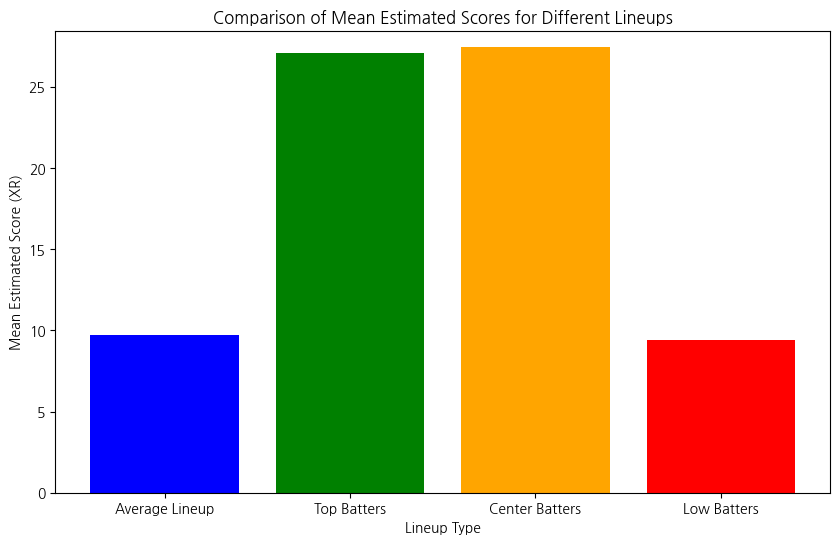

In [ ]:
# Visualize the mean estimated scores for each lineup
import matplotlib.pyplot as plt

lineup_names = ['Average Lineup', 'Top Batters', 'Center Batters', 'Low Batters']
mean_estimated_scores = [
    sample_lineup['추정득점'].mean(),
    sample_lineup_top['추정득점'].mean(),
    sample_lineup_center['추정득점'].mean(),
    sample_lineup_low['추정득점'].mean()
]

plt.figure(figsize=(10, 6))
plt.bar(lineup_names, mean_estimated_scores, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Lineup Type')
plt.ylabel('Mean Estimated Score (XR)')
plt.title('Comparison of Mean Estimated Scores for Different Lineups')
plt.ylim(0, max(mean_estimated_scores) + 1)
plt.show()

# KBO 2022년도

## 데이터전처리

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/13.데이터톤-19/데이터 크롤링/KBO/KBO_hitter_2022.csv')
df2 = pd.read_csv('/content/drive/MyDrive/13.데이터톤-19/데이터 크롤링/KBO/KBO_hitter_detail_2022.csv')
df3 = pd.read_csv('/content/drive/MyDrive/13.데이터톤-19/데이터 크롤링/KBO/KBO_batting_order_2022.csv')
df4 = pd.read_csv('/content/drive/MyDrive/13.데이터톤-19/데이터 크롤링/KBO/KBO_runner_2022.csv',)
display(df1.head(2),df1.shape, df2.head(2),df2.shape, df3.head(2), df3.shape, df4.head(2), df4.shape)

,선수명,팀명,타율,경기,타석,타수,득점,안타,2루타,3루타,...,고의4구,사구,삼진,병살타,장타율,출루율,출루율+장타율,멀티히트,득점권타율,대타타율
0,권혁경,KIA,0.500,2,2,2,0,1,0,0,...,0,0,0,0,0.500,0.500,1.000,0,0.5,0.0
1,김선우,KIA,0.333,3,4,3,1,1,0,0,...,0,1,0,0,0.333,0.500,0.833,0,0.0,0.0


(356, 26)

,선수명,팀명,타율,장타,땅볼,뜬공,땅볼/뜬공,결승타,볼넷/삼진,투구수/타석,순수장타율,추정득점,(1.8x출루율+장타율)/4
0,권혁경,KIA,0.500,0,0,1,0.00,0,-,5.50,0.000,0.4,0.350
1,김선우,KIA,0.333,0,1,1,1.00,0,-,2.75,0.000,0.7,0.308


(356, 13)

,선수명,팀명,타율,타수,안타,2루타,3루타,홈런,타점,볼넷,사구,삼진,병살타,타순
0,김호령,KIA,1.0,1,1,0,0,0,0,0,0,0,0,1번
1,고종욱,KIA,0.5,2,1,0,0,0,0,1,0,0,0,1번


(2372, 14)

,선수명,팀명,경기,도루시도,도루허용,도루저지,도루성공률,주루사,견제사
0,박찬호,KIA,130,50,42,8,84.0,7,0
1,김도영,KIA,103,16,13,3,81.3,7,0


(356, 9)

In [ ]:
# df1 = hitter
df1_selected = df1[['경기', '선수명', '고의4구', '희생플라이', '희생번트', '득점권타율']]

# df4 = runner
df4_selected = df4[['선수명', '도루허용', '도루저지']]

# df3에 df1과 df4의 선택된 컬럼들 병합 (df3 = batting order)
merged_df = df3.merge(df1_selected, on='선수명').merge(df4_selected, on='선수명')

# 1루타 열 계산 (안타 - 2루타 - 3루타 - 홈런)
merged_df['1루타'] = merged_df['안타'] - merged_df['2루타'] - merged_df['3루타'] - merged_df['홈런']

# 결과 출력
merged_df

,선수명,팀명,타율,타수,안타,2루타,3루타,홈런,타점,볼넷,...,병살타,타순,경기,고의4구,희생플라이,희생번트,득점권타율,도루허용,도루저지,1루타
0,김호령,KIA,1.0,1,1,0,0,0,0,0,...,0,1번,54,0,0,4,0.222,2,1,1
1,김호령,KIA,0.286,7,2,0,0,1,4,1,...,1,2번,54,0,0,4,0.222,2,1,1
2,김호령,KIA,0.0,2,0,0,0,0,0,0,...,0,3번,54,0,0,4,0.222,2,1,0
3,김호령,KIA,1.0,1,1,1,0,0,0,0,...,0,4번,54,0,0,4,0.222,2,1,0
4,김호령,KIA,0.0,4,0,0,0,0,0,0,...,0,5번,54,0,0,4,0.222,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,백용환,한화,0.500,2,1,1,0,0,0,0,...,0,5번,4,0,0,0,0.000,0,0,0
2662,백용환,한화,0.0,1,0,0,0,0,0,0,...,0,7번,4,0,0,0,0.000,0,0,0
2663,백용환,한화,0.0,2,0,0,0,0,0,0,...,0,9번,4,0,0,0,0.000,0,0,0
2664,백용환,한화,0.5,2,1,1,0,0,0,0,...,0,중심(3~5번),4,0,0,0,0.000,0,0,0


In [ ]:
# XR 계산 함수 정의
def calculate_XR(row):
    XR = (row['1루타'] * 0.5 +
          row['2루타'] * 0.72 +
          row['3루타'] * 1.04 +
          row['홈런'] * 1.44 +
          (row['사구'] + row['볼넷'] - row['고의4구']) * 0.34 +
          row['고의4구'] * 0.25 +
          row['도루허용'] * 0.18 -
          row['도루저지'] * 0.32 -
          (row['타수'] - row['안타'] - row['삼진']) * 0.09 -
          row['삼진'] * 0.098 -
          row['병살타'] * 0.37 +
          row['희생플라이'] * 0.37 +
          row['희생번트'] * 0.04)  # 희생번트 값 추가
    return XR

# 각 선수의 XR 계산
merged_df['추정득점'] = merged_df.apply(calculate_XR, axis=1)

# 결과 출력
merged_df

,선수명,팀명,타율,타수,안타,2루타,3루타,홈런,타점,볼넷,...,타순,경기,고의4구,희생플라이,희생번트,득점권타율,도루허용,도루저지,1루타,추정득점
0,김호령,KIA,1.0,1,1,0,0,0,0,0,...,1번,54,0,0,4,0.222,2,1,1,0.700
1,김호령,KIA,0.286,7,2,0,0,1,4,1,...,2번,54,0,0,4,0.222,2,1,1,1.644
2,김호령,KIA,0.0,2,0,0,0,0,0,0,...,3번,54,0,0,4,0.222,2,1,0,0.004
3,김호령,KIA,1.0,1,1,1,0,0,0,0,...,4번,54,0,0,4,0.222,2,1,0,0.920
4,김호령,KIA,0.0,4,0,0,0,0,0,0,...,5번,54,0,0,4,0.222,2,1,0,-0.176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,백용환,한화,0.500,2,1,1,0,0,0,0,...,5번,4,0,0,0,0.000,0,0,0,0.630
2662,백용환,한화,0.0,1,0,0,0,0,0,0,...,7번,4,0,0,0,0.000,0,0,0,-0.098
2663,백용환,한화,0.0,2,0,0,0,0,0,0,...,9번,4,0,0,0,0.000,0,0,0,-0.180
2664,백용환,한화,0.5,2,1,1,0,0,0,0,...,중심(3~5번),4,0,0,0,0.000,0,0,0,0.630


In [ ]:
game_mean = merged_df['경기'].mean()
game_mean

69.77306826706676

In [ ]:
KBO_2022 = merged_df[merged_df['경기'] >= game_mean]
KBO_2022.drop(columns=['타율'], axis=1, inplace=True)

KBO_2022

<ipython-input-187-4ee92f0d0091>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  KBO_2022.drop(columns=['타율'], axis=1, inplace=True)


,선수명,팀명,타수,안타,2루타,3루타,홈런,타점,볼넷,사구,...,타순,경기,고의4구,희생플라이,희생번트,득점권타율,도루허용,도루저지,1루타,추정득점
35,류지혁,KIA,168,54,8,0,1,20,31,2,...,1번,127,0,2,8,0.305,8,4,45,30.876
36,류지혁,KIA,8,2,0,0,0,0,2,0,...,2번,127,0,2,8,0.305,8,4,2,1.982
37,류지혁,KIA,1,0,0,0,0,0,0,0,...,3번,127,0,2,8,0.305,8,4,0,1.130
38,류지혁,KIA,2,0,0,0,0,0,0,0,...,4번,127,0,2,8,0.305,8,4,0,1.040
39,류지혁,KIA,1,0,0,0,0,0,0,0,...,5번,127,0,2,8,0.305,8,4,0,1.130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2639,하주석,한화,2,1,1,0,0,0,0,0,...,8번,125,1,3,1,0.255,20,6,0,3.362
2640,하주석,한화,3,2,0,0,0,2,0,0,...,9번,125,1,3,1,0.255,20,6,2,3.650
2641,하주석,한화,4,0,0,0,0,0,1,0,...,상위(1~2번),125,1,3,1,0.255,20,6,0,2.704
2642,하주석,한화,237,54,7,0,1,27,18,2,...,중심(3~5번),125,1,3,1,0.255,20,6,46,21.218


## 샘플

In [ ]:
# 샘플 선수 생성 (평균 값 사용)
sample_player = KBO_2022.mean(numeric_only=True).to_dict()
sample_player['선수명'] = '샘플선수'
sample_player['팀명'] = 'KBO'
sample_player['타순'] = None

sample_player

{'타수': 66.37853949329359,
 '안타': 17.63338301043219,
 '2루타': 3.029806259314456,
 '3루타': 0.28763040238450077,
 '홈런': 1.5245901639344261,
 '타점': 8.57973174366617,
 '볼넷': 6.858420268256334,
 '사구': 1.0,
 '삼진': 13.429210134128168,
 '병살타': 1.4947839046199702,
 '경기': 108.37481371087928,
 '고의4구': 1.4120715350223547,
 '희생플라이': 2.825633383010432,
 '희생번트': 4.3912071535022354,
 '득점권타율': 0.2563591654247392,
 '도루허용': 5.721311475409836,
 '도루저지': 2.354694485842027,
 '1루타': 12.791356184798808,
 '추정득점': 10.066359165424739,
 '선수명': '샘플선수',
 '팀명': 'KBO',
 '타순': None}

In [ ]:
sample_lineup = pd.DataFrame([sample_player] * 9)
sample_lineup['타순'] = range(1, 10)

column_order = ['선수명', '팀명', '타수', '안타', '2루타', '3루타', '홈런', '타점', '볼넷', '사구',
                '삼진', '병살타', '타순', '경기', '고의4구', '희생플라이', '희생번트', '득점권타율', '도루허용',
                '도루저지', '1루타', '추정득점']
sample_lineup = sample_lineup[column_order]

In [ ]:
sample_lineup.drop(['안타', '2루타', '3루타', '홈런', '타점', '볼넷', '사구',
                '삼진', '병살타', '고의4구', '희생플라이', '희생번트','도루허용',
                '도루저지', '1루타'], axis=1, inplace=True)
sample_lineup

,선수명,팀명,타수,타순,경기,득점권타율,추정득점
0,샘플선수,KBO,66.378539,1,108.374814,0.256359,10.066359
1,샘플선수,KBO,66.378539,2,108.374814,0.256359,10.066359
2,샘플선수,KBO,66.378539,3,108.374814,0.256359,10.066359
3,샘플선수,KBO,66.378539,4,108.374814,0.256359,10.066359
4,샘플선수,KBO,66.378539,5,108.374814,0.256359,10.066359
5,샘플선수,KBO,66.378539,6,108.374814,0.256359,10.066359
6,샘플선수,KBO,66.378539,7,108.374814,0.256359,10.066359
7,샘플선수,KBO,66.378539,8,108.374814,0.256359,10.066359
8,샘플선수,KBO,66.378539,9,108.374814,0.256359,10.066359


## 상위타순

In [ ]:
# '타순' 열의 값이 '1번', '2번', '상위(1~2번)'인 행만 선택
table_batters = KBO_2022[KBO_2022['타순'].isin(['1번', '2번', '상위(1~2번)'])]

# 결과 확인
table_batters

,선수명,팀명,타수,안타,2루타,3루타,홈런,타점,볼넷,사구,...,타순,경기,고의4구,희생플라이,희생번트,득점권타율,도루허용,도루저지,1루타,추정득점
35,류지혁,KIA,168,54,8,0,1,20,31,2,...,1번,127,0,2,8,0.305,8,4,45,30.876
36,류지혁,KIA,8,2,0,0,0,0,2,0,...,2번,127,0,2,8,0.305,8,4,2,1.982
44,류지혁,KIA,176,56,8,0,1,20,33,2,...,상위(1~2번),127,0,2,8,0.305,8,4,47,31.638
47,박찬호,KIA,340,97,16,0,3,29,39,1,...,1번,130,0,7,8,0.277,42,8,78,52.640
48,박찬호,KIA,20,5,0,0,0,2,1,0,...,2번,130,0,7,8,0.277,42,8,5,9.014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2605,최재훈,한화,171,33,3,0,1,7,27,11,...,상위(1~2번),114,0,2,5,0.263,1,1,29,16.546
2614,김인환,한화,2,0,0,0,0,0,0,0,...,2번,113,2,4,0,0.203,2,0,0,1.480
2622,김인환,한화,2,0,0,0,0,0,0,0,...,상위(1~2번),113,2,4,0,0.203,2,0,0,1.480
2634,하주석,한화,4,0,0,0,0,0,1,0,...,2번,125,1,3,1,0.255,20,6,0,2.704


In [ ]:
# 득점권 타율이 높은 선수  선택
top_avg_players_table = table_batters.nlargest(30, '득점권타율')
# 추정 득점이 높은 순으로 정렬
top_avg_players_table_sorted = top_avg_players_table.sort_values(by='추정득점', ascending=False)
top_avg_players_table_sorted
# 선수명 중복 없이 상위 2명 선택
top_2_unique_players_table = top_avg_players_table_sorted.drop_duplicates(subset='선수명').head(2)
top_2_unique_players_table

,선수명,팀명,타수,안타,2루타,3루타,홈런,타점,볼넷,사구,...,타순,경기,고의4구,희생플라이,희생번트,득점권타율,도루허용,도루저지,1루타,추정득점
1133,최지훈,SSG,547,164,29,2,10,57,45,6,...,상위(1~2번),144,0,4,13,0.362,31,7,123,83.872
628,박해민,LG,558,160,20,8,3,48,42,9,...,상위(1~2번),144,0,6,7,0.333,24,6,129,75.816


In [ ]:
top_2_unique_players_table.drop(['안타', '2루타', '3루타', '홈런', '타점', '볼넷', '사구',
                '삼진', '병살타', '고의4구', '희생플라이', '희생번트','도루허용',
                '도루저지', '1루타'], axis=1, inplace=True)
top_2_unique_players_table

,선수명,팀명,타수,타순,경기,득점권타율,추정득점
1133,최지훈,SSG,547,상위(1~2번),144,0.362,83.872
628,박해민,LG,558,상위(1~2번),144,0.333,75.816


In [ ]:
# Align columns of top_2_unique_players_table to match sample_lineup
top_2_unique_players_table = top_2_unique_players_table.reindex(columns=sample_lineup.columns, fill_value=None)

In [ ]:
sample_lineup_top = sample_lineup.copy()
# Insert top 2 unique players into the 1st and 2nd positions of sample_lineup
for i in range(2):
    sample_lineup_top.iloc[0 + i, :len(top_2_unique_players_table.columns)] = top_2_unique_players_table.iloc[i, :].values

sample_lineup_top

,선수명,팀명,타수,타순,경기,득점권타율,추정득점
0,최지훈,SSG,547.000000,상위(1~2번),144.000000,0.362000,83.872000
1,박해민,LG,558.000000,상위(1~2번),144.000000,0.333000,75.816000
2,샘플선수,KBO,66.378539,3,108.374814,0.256359,10.066359
3,샘플선수,KBO,66.378539,4,108.374814,0.256359,10.066359
4,샘플선수,KBO,66.378539,5,108.374814,0.256359,10.066359
5,샘플선수,KBO,66.378539,6,108.374814,0.256359,10.066359
6,샘플선수,KBO,66.378539,7,108.374814,0.256359,10.066359
7,샘플선수,KBO,66.378539,8,108.374814,0.256359,10.066359
8,샘플선수,KBO,66.378539,9,108.374814,0.256359,10.066359


In [ ]:
print(sample_lineup['추정득점'].mean(),
      sample_lineup_low['추정득점'].mean())

10.066359165424739 9.423696400625978


## 중위타순

In [ ]:
# '타순' 열의 값이 '3번', '4번', '5번', '중심(3~5번)'인 행만 선택
center_batters = KBO_2022[KBO_2022['타순'].isin(['3번', '4번', '5번', '중심(3~5번)'])]

# 결과 확인
center_batters

,선수명,팀명,타수,안타,2루타,3루타,홈런,타점,볼넷,사구,...,타순,경기,고의4구,희생플라이,희생번트,득점권타율,도루허용,도루저지,1루타,추정득점
37,류지혁,KIA,1,0,0,0,0,0,0,0,...,3번,127,0,2,8,0.305,8,4,0,1.130
38,류지혁,KIA,2,0,0,0,0,0,0,0,...,4번,127,0,2,8,0.305,8,4,0,1.040
39,류지혁,KIA,1,0,0,0,0,0,0,0,...,5번,127,0,2,8,0.305,8,4,0,1.130
45,류지혁,KIA,4,0,0,0,0,0,0,0,...,중심(3~5번),127,0,2,8,0.305,8,4,0,0.860
56,이창진,KIA,11,3,1,0,0,0,2,0,...,3번,111,0,4,11,0.290,3,5,2,2.532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2617,김인환,한화,103,33,2,0,6,15,5,0,...,5번,113,2,4,0,0.203,2,0,25,18.684
2623,김인환,한화,298,86,8,0,15,47,18,3,...,중심(3~5번),113,2,4,0,0.203,2,0,63,46.830
2635,하주석,한화,4,1,0,0,0,1,0,0,...,3번,125,1,3,1,0.255,20,6,1,2.954
2636,하주석,한화,233,53,7,0,1,26,18,2,...,5번,125,1,3,1,0.255,20,6,45,21.004


In [ ]:
# 득점권 타율이 높은 선수 선택
top_avg_players_center = center_batters.nlargest(30, '득점권타율')
# 추정 득점이 높은 순으로 정렬
top_avg_players_center_sorted = top_avg_players_center.sort_values(by='추정득점', ascending=False)
top_avg_players_center_sorted
# 선수명 중복 없이 선택
top_3_unique_players_center = top_avg_players_center_sorted.drop_duplicates(subset='선수명').head(3)
top_3_unique_players_center

,선수명,팀명,타수,안타,2루타,3루타,홈런,타점,볼넷,사구,...,타순,경기,고의4구,희생플라이,희생번트,득점권타율,도루허용,도루저지,1루타,추정득점
2438,이정후,키움,550,191,36,10,23,111,65,5,...,3번,142,12,3,0,0.387,5,0,122,119.274
1993,피렐라,삼성,453,153,28,2,22,92,40,10,...,중심(3~5번),141,12,2,0,0.375,15,5,101,90.188
1060,양의지,NC,420,118,24,0,20,92,60,13,...,중심(3~5번),130,6,10,0,0.350,3,1,74,77.812


In [ ]:
top_3_unique_players_center.drop(['안타', '2루타', '3루타', '홈런', '타점', '볼넷', '사구',
                '삼진', '병살타', '고의4구', '희생플라이', '희생번트','도루허용',
                '도루저지', '1루타'], axis=1, inplace=True)
top_3_unique_players_center

,선수명,팀명,타수,타순,경기,득점권타율,추정득점
2438,이정후,키움,550,3번,142,0.387,119.274
1993,피렐라,삼성,453,중심(3~5번),141,0.375,90.188
1060,양의지,NC,420,중심(3~5번),130,0.350,77.812


In [ ]:
# sample_lineup의 3, 4, 5번 자리에 top_3_unique_players 넣기
# Adjusting the columns of the top 3 players to match the sample lineup structure
top_3_unique_players_center_adjusted = top_3_unique_players_center.reindex(columns=sample_lineup.columns)

# Creating a copy of sample lineup
sample_lineup_center = sample_lineup.copy()

# Replacing the 3rd, 4th, and 5th positions with the top 3 unique players
for i in range(3):
    sample_lineup_center.iloc[2 + i, :] = top_3_unique_players_center_adjusted.iloc[i, :].values


sample_lineup_center

,선수명,팀명,타수,타순,경기,득점권타율,추정득점
0,샘플선수,KBO,66.378539,1,108.374814,0.256359,10.066359
1,샘플선수,KBO,66.378539,2,108.374814,0.256359,10.066359
2,이정후,키움,550.000000,3번,142.000000,0.387000,119.274000
3,피렐라,삼성,453.000000,중심(3~5번),141.000000,0.375000,90.188000
4,양의지,NC,420.000000,중심(3~5번),130.000000,0.350000,77.812000
5,샘플선수,KBO,66.378539,6,108.374814,0.256359,10.066359
6,샘플선수,KBO,66.378539,7,108.374814,0.256359,10.066359
7,샘플선수,KBO,66.378539,8,108.374814,0.256359,10.066359
8,샘플선수,KBO,66.378539,9,108.374814,0.256359,10.066359


In [ ]:
print(sample_lineup['추정득점'].mean(),
      sample_lineup_center['추정득점'].mean())

10.066359165424739 38.630239443616496


## 하위타순

In [ ]:
# '타순' 열의 값이 '6번', '7번', '8번','9번' '하위(6~9번)'인 행만 선택
low_batters = KBO_2022[KBO_2022['타순'].isin(['6번', '7번', '8번','9번' '하위(6~9번)'])]

# 결과 확인
low_batters

,선수명,팀명,타수,안타,2루타,3루타,홈런,타점,볼넷,사구,...,타순,경기,고의4구,희생플라이,희생번트,득점권타율,도루허용,도루저지,1루타,추정득점
40,류지혁,KIA,4,1,0,1,0,4,0,2,...,6번,127,0,2,8,0.305,8,4,0,2.662
41,류지혁,KIA,54,18,3,0,0,9,3,1,...,7번,127,0,2,8,0.305,8,4,15,8.936
42,류지혁,KIA,29,7,2,0,1,2,5,1,...,8번,127,0,2,8,0.305,8,4,4,6.088
49,박찬호,KIA,10,4,0,0,0,1,0,0,...,7번,130,0,7,8,0.277,42,8,4,9.354
50,박찬호,KIA,8,4,0,0,0,1,1,0,...,8번,130,0,7,8,0.277,42,8,4,9.890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2619,김인환,한화,21,5,1,0,1,3,1,0,...,7번,113,2,4,0,0.203,2,0,3,3.810
2620,김인환,한화,5,0,0,0,0,0,1,0,...,8번,113,2,4,0,0.203,2,0,0,1.542
2637,하주석,한화,164,49,10,2,3,23,7,0,...,6번,125,1,3,1,0.255,20,6,34,24.680
2638,하주석,한화,35,9,0,0,1,6,5,1,...,7번,125,1,3,1,0.255,20,6,8,7.438


In [ ]:
# 득점권 타율이 높은 선수 선택
top_avg_players_low = low_batters.nlargest(30, '득점권타율')
# 추정 득점이 높은 순으로 정렬
top_avg_players_low_sorted = top_avg_players_low.sort_values(by='추정득점', ascending=False)
top_avg_players_low_sorted
# 선수명 중복 없이 선택
top_4_unique_players_low = top_avg_players_low_sorted.drop_duplicates(subset='선수명').head(4)
top_4_unique_players_low

,선수명,팀명,타수,안타,2루타,3루타,홈런,타점,볼넷,사구,...,타순,경기,고의4구,희생플라이,희생번트,득점권타율,도루허용,도루저지,1루타,추정득점
1594,박세혁,두산,143,43,7,1,3,21,17,3,...,6번,128,1,4,8,0.354,2,2,32,25.438
2127,이원석,삼성,58,20,4,0,3,17,8,2,...,6번,88,2,6,3,0.368,0,0,13,15.768
1197,전의산,SSG,80,22,6,1,7,21,7,0,...,6번,77,3,1,0,0.323,0,0,8,14.658
1675,고승민,롯데,44,17,3,1,2,9,5,0,...,7번,92,0,1,2,0.328,1,4,11,10.112


In [ ]:
top_4_unique_players_low.drop(['안타', '2루타', '3루타', '홈런', '타점', '볼넷', '사구',
                '삼진', '병살타', '고의4구', '희생플라이', '희생번트','도루허용',
                '도루저지', '1루타'], axis=1, inplace=True)
top_4_unique_players_low

,선수명,팀명,타수,타순,경기,득점권타율,추정득점
1594,박세혁,두산,143,6번,128,0.354,25.438
2127,이원석,삼성,58,6번,88,0.368,15.768
1197,전의산,SSG,80,6번,77,0.323,14.658
1675,고승민,롯데,44,7번,92,0.328,10.112


In [ ]:
# sample_lineup의 열과 맞추기 위해 top_4_unique_players_low의 열 정리
sample_lineup_columns = sample_lineup.columns
top_4_unique_players_low = top_4_unique_players_low[sample_lineup_columns]

In [ ]:
# sample_lineup의 6, 7, 8, 9번 자리에 top_4_unique_players 넣기
sample_lineup_low = sample_lineup.copy()
for i in range(4):
    sample_lineup_low.iloc[5 + i, :] = top_4_unique_players_low.iloc[i, :].values

# 결과 확인
sample_lineup_low

,선수명,팀명,타수,타순,경기,득점권타율,추정득점
0,샘플선수,KBO,66.378539,1,108.374814,0.256359,10.066359
1,샘플선수,KBO,66.378539,2,108.374814,0.256359,10.066359
2,샘플선수,KBO,66.378539,3,108.374814,0.256359,10.066359
3,샘플선수,KBO,66.378539,4,108.374814,0.256359,10.066359
4,샘플선수,KBO,66.378539,5,108.374814,0.256359,10.066359
5,박세혁,두산,143.000000,6번,128.000000,0.354000,25.438000
6,이원석,삼성,58.000000,6번,88.000000,0.368000,15.768000
7,전의산,SSG,80.000000,6번,77.000000,0.323000,14.658000
8,고승민,롯데,44.000000,7번,92.000000,0.328000,10.112000


In [ ]:
print(sample_lineup['추정득점'].mean(),
      sample_lineup_low['추정득점'].mean())

10.066359165424739 12.923088425235965


## 시각화

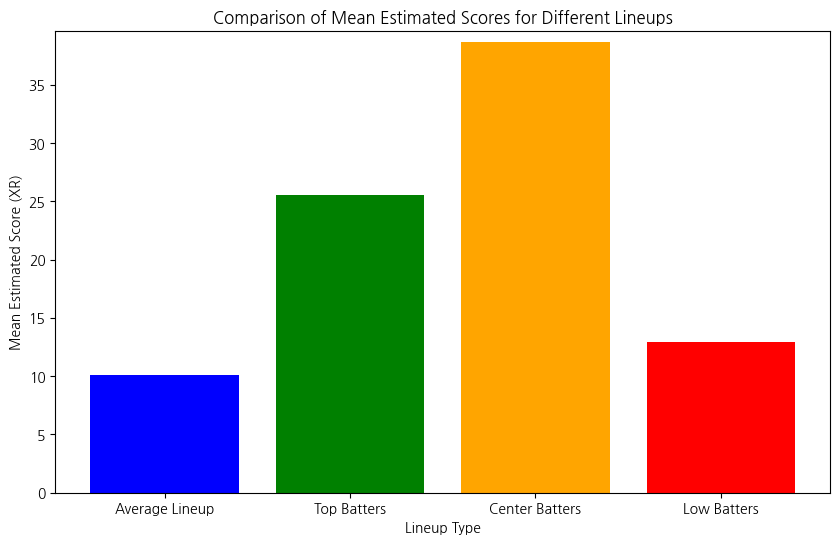

In [ ]:
lineup_names = ['Average Lineup', 'Top Batters', 'Center Batters', 'Low Batters']
mean_estimated_scores = [
    sample_lineup['추정득점'].mean(),
    sample_lineup_top['추정득점'].mean(),
    sample_lineup_center['추정득점'].mean(),
    sample_lineup_low['추정득점'].mean()
]

plt.figure(figsize=(10, 6))
plt.bar(lineup_names, mean_estimated_scores, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Lineup Type')
plt.ylabel('Mean Estimated Score (XR)')
plt.title('Comparison of Mean Estimated Scores for Different Lineups')
plt.ylim(0, max(mean_estimated_scores) + 1)
plt.show()

# KBO 2021년도

## 데이터전처리

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/13.데이터톤-19/데이터 크롤링/KBO/KBO_hitter_2021.csv')
df2 = pd.read_csv('/content/drive/MyDrive/13.데이터톤-19/데이터 크롤링/KBO/KBO_hitter_detail_2021.csv')
df3 = pd.read_csv('/content/drive/MyDrive/13.데이터톤-19/데이터 크롤링/KBO/KBO_batting_order_2021.csv')
df4 = pd.read_csv('/content/drive/MyDrive/13.데이터톤-19/데이터 크롤링/KBO/KBO_runner_2021.csv')
display(df1.head(2),df1.shape, df2.head(2),df2.shape, df3.head(2), df3.shape, df4.head(2), df4.shape)

,선수명,팀명,타율,경기,타석,타수,득점,안타,2루타,3루타,...,고의4구,사구,삼진,병살타,장타율,출루율,출루율+장타율,멀티히트,득점권타율,대타타율
0,최정민,KIA,0.333,39,19,15,5,5,0,0.0,...,0.0,1.0,7.0,1.0,0.333,0.474,0.807,0.0,0.75,0.0
1,김선빈,KIA,0.307,130,564,501,55,154,32,0.0,...,2.0,1.0,39.0,19.0,0.401,0.375,0.776,47.0,0.32,0.0


(394, 26)

,선수명,팀명,타율,장타,땅볼,뜬공,땅볼/뜬공,결승타,볼넷/삼진,투구수/타석,순수장타율,추정득점,(1.8x출루율+장타율)/4
0,최정민,KIA,0.333,0,1,2,0.50,0,0.43,4.00,0.000,1.9,0.297
1,김선빈,KIA,0.307,37,181,132,1.37,7,1.44,3.82,0.094,71.3,0.269


(394, 13)

,선수명,팀명,타율,타수,안타,2루타,3루타,홈런,타점,볼넷,사구,삼진,병살타,타순
0,이우성,KIA,1.0,1,1,0,0,0,0,0,0,0,0,1번
1,이창진,KIA,1.0,1,1,1,0,0,1,0,0,0,0,1번


(2403, 14)

,선수명,팀명,경기,도루시도,도루허용,도루저지,도루성공률,주루사,견제사
0,최원준,KIA,143,53,40,13,75.5,6,4
1,박찬호,KIA,131,13,9,4,69.2,7,0


(394, 9)

In [ ]:
# df1 = hitter
df1_selected = df1[['경기', '선수명', '고의4구', '희생플라이', '희생번트', '득점권타율']]

# df4 = runner
df4_selected = df4[['선수명', '도루허용', '도루저지']]

# df3에 df1과 df4의 선택된 컬럼들 병합 (df3 = batting order)
merged_df = df3.merge(df1_selected, on='선수명').merge(df4_selected, on='선수명')

# 1루타 열 계산 (안타 - 2루타 - 3루타 - 홈런)
merged_df['1루타'] = merged_df['안타'] - merged_df['2루타'] - merged_df['3루타'] - merged_df['홈런']

# 결과 출력
merged_df

,선수명,팀명,타율,타수,안타,2루타,3루타,홈런,타점,볼넷,...,병살타,타순,경기,고의4구,희생플라이,희생번트,득점권타율,도루허용,도루저지,1루타
0,이우성,KIA,1.0,1,1,0,0,0,0,0,...,0,1번,65,0.0,1.0,1.0,0.111,2,1,1
1,이우성,KIA,0.5,2,1,0,0,0,0,0,...,0,3번,65,0.0,1.0,1.0,0.111,2,1,1
2,이우성,KIA,0.6,5,3,0,0,0,2,1,...,0,5번,65,0.0,1.0,1.0,0.111,2,1,3
3,이우성,KIA,0.129,31,4,2,0,0,0,5,...,1,6번,65,0.0,1.0,1.0,0.111,2,1,2
4,이우성,KIA,0.25,28,7,3,0,0,0,4,...,0,7번,65,0.0,1.0,1.0,0.111,2,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2918,송호정,한화,0.000,3,0,0,0,0,0,0,...,0,중심(3~5번),10,0.0,0.0,0.0,0.000,0,0,0
2919,송호정,한화,0.0,7,0,0,0,0,0,1,...,0,하위(6~9번),10,0.0,0.0,0.0,0.000,0,0,0
2920,정민규,한화,0.000,1,0,0,0,0,0,0,...,0,8번,6,0.0,0.0,0.0,0.000,0,0,0
2921,정민규,한화,0.133,15,2,1,0,0,0,1,...,1,9번,6,0.0,0.0,0.0,0.000,0,0,1


In [ ]:
# XR 계산 함수 정의
def calculate_XR(row):
    XR = (row['1루타'] * 0.5 +
          row['2루타'] * 0.72 +
          row['3루타'] * 1.04 +
          row['홈런'] * 1.44 +
          (row['사구'] + row['볼넷'] - row['고의4구']) * 0.34 +
          row['고의4구'] * 0.25 +
          row['도루허용'] * 0.18 -
          row['도루저지'] * 0.32 -
          (row['타수'] - row['안타'] - row['삼진']) * 0.09 -
          row['삼진'] * 0.098 -
          row['병살타'] * 0.37 +
          row['희생플라이'] * 0.37 +
          row['희생번트'] * 0.04)  # 희생번트 값 추가
    return XR

# 각 선수의 XR 계산
merged_df['추정득점'] = merged_df.apply(calculate_XR, axis=1)

# 결과 출력
merged_df

,선수명,팀명,타율,타수,안타,2루타,3루타,홈런,타점,볼넷,...,타순,경기,고의4구,희생플라이,희생번트,득점권타율,도루허용,도루저지,1루타,추정득점
0,이우성,KIA,1.0,1,1,0,0,0,0,0,...,1번,65,0.0,1.0,1.0,0.111,2,1,1,0.950
1,이우성,KIA,0.5,2,1,0,0,0,0,0,...,3번,65,0.0,1.0,1.0,0.111,2,1,1,0.860
2,이우성,KIA,0.6,5,3,0,0,0,2,1,...,5번,65,0.0,1.0,1.0,0.111,2,1,3,2.102
3,이우성,KIA,0.129,31,4,2,0,0,0,5,...,6번,65,0.0,1.0,1.0,0.111,2,1,2,1.750
4,이우성,KIA,0.25,28,7,3,0,0,0,4,...,7번,65,0.0,1.0,1.0,0.111,2,1,4,4.024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2918,송호정,한화,0.000,3,0,0,0,0,0,0,...,중심(3~5번),10,0.0,0.0,0.0,0.000,0,0,0,-0.294
2919,송호정,한화,0.0,7,0,0,0,0,0,1,...,하위(6~9번),10,0.0,0.0,0.0,0.000,0,0,0,-0.330
2920,정민규,한화,0.000,1,0,0,0,0,0,0,...,8번,6,0.0,0.0,0.0,0.000,0,0,0,-0.098
2921,정민규,한화,0.133,15,2,1,0,0,0,1,...,9번,6,0.0,0.0,0.0,0.000,0,0,1,-0.020


In [ ]:
game_mean = merged_df['경기'].mean()
game_mean

67.21279507355457

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib import font_manager, rc

# Google Drive에 업로드한 폰트 파일을 Colab으로 복사
!cp /content/NanumGothic.ttf

# 파일이 제대로 복사되었는지 확인
!ls -l /content/NanumGothic.ttf

cp: missing destination file operand after '/content/NanumGothic.ttf'
Try 'cp --help' for more information.
ls: cannot access '/content/NanumGothic.ttf': No such file or directory


In [ ]:
KBO_2021 = merged_df[merged_df['경기'] >= game_mean]
KBO_2021.drop(columns=['타율'], axis=1, inplace=True)

KBO_2021

<ipython-input-214-22ec56ec504d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  KBO_2021.drop(columns=['타율'], axis=1, inplace=True)


,선수명,팀명,타수,안타,2루타,3루타,홈런,타점,볼넷,사구,...,타순,경기,고의4구,희생플라이,희생번트,득점권타율,도루허용,도루저지,1루타,추정득점
10,이창진,KIA,1,1,1,0,0,1,0,0,...,1번,105,0.0,3.0,4.0,0.270,5,0,0,2.890
11,이창진,KIA,12,2,0,0,0,0,1,0,...,2번,105,0.0,3.0,4.0,0.270,5,0,2,2.594
12,이창진,KIA,2,0,0,0,0,0,0,0,...,3번,105,0.0,3.0,4.0,0.270,5,0,0,1.982
13,이창진,KIA,11,0,0,0,0,2,1,0,...,4번,105,0.0,3.0,4.0,0.270,5,0,0,1.496
14,이창진,KIA,29,5,1,0,0,3,5,0,...,5번,105,0.0,3.0,4.0,0.270,5,0,4,4.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2908,노시환,한화,264,64,9,0,9,40,51,1,...,4번,107,9.0,4.0,0.0,0.341,5,2,46,38.750
2909,노시환,한화,86,28,6,0,6,28,11,0,...,5번,107,9.0,4.0,0.0,0.341,5,2,16,19.486
2910,노시환,한화,27,11,3,1,3,16,11,0,...,6번,107,9.0,4.0,0.0,0.341,5,2,4,11.584
2911,노시환,한화,353,92,15,0,15,68,62,1,...,중심(3~5번),107,9.0,4.0,0.0,0.341,5,2,62,57.020


## 샘플

In [ ]:
# 샘플 선수 생성 (평균 값 사용)
sample_player = KBO_2021.mean(numeric_only=True).to_dict()
sample_player['선수명'] = '샘플선수'
sample_player['팀명'] = 'KBO'
sample_player['타순'] = None

sample_player

{'타수': 61.55062823355506,
 '안타': 16.48632668144863,
 '2루타': 2.847006651884701,
 '3루타': 0.21433850702143384,
 '홈런': 1.5121951219512195,
 '타점': 8.517368810051737,
 '볼넷': 7.623059866962306,
 '사구': 0.975609756097561,
 '삼진': 12.1019955654102,
 '병살타': 1.3895048041389504,
 '경기': 109.0990391722099,
 '고의4구': 1.3739495798319328,
 '희생플라이': 3.1403361344537815,
 '희생번트': 3.2436974789915967,
 '득점권타율': 0.2636949579831933,
 '도루허용': 5.551367331855137,
 '도루저지': 2.261640798226164,
 '1루타': 11.912786400591278,
 '추정득점': 10.210047058823529,
 '선수명': '샘플선수',
 '팀명': 'KBO',
 '타순': None}

In [ ]:
sample_lineup = pd.DataFrame([sample_player] * 9)
sample_lineup['타순'] = range(1, 10)

column_order = ['선수명', '팀명', '타수', '안타', '2루타', '3루타', '홈런', '타점', '볼넷', '사구',
                '삼진', '병살타', '타순', '경기', '고의4구', '희생플라이', '희생번트', '득점권타율', '도루허용',
                '도루저지', '1루타', '추정득점']
sample_lineup = sample_lineup[column_order]

In [ ]:
sample_lineup.drop(['안타', '2루타', '3루타', '홈런', '타점', '볼넷', '사구',
                '삼진', '병살타', '고의4구', '희생플라이', '희생번트','도루허용',
                '도루저지', '1루타'], axis=1, inplace=True)
sample_lineup

,선수명,팀명,타수,타순,경기,득점권타율,추정득점
0,샘플선수,KBO,61.550628,1,109.099039,0.263695,10.210047
1,샘플선수,KBO,61.550628,2,109.099039,0.263695,10.210047
2,샘플선수,KBO,61.550628,3,109.099039,0.263695,10.210047
3,샘플선수,KBO,61.550628,4,109.099039,0.263695,10.210047
4,샘플선수,KBO,61.550628,5,109.099039,0.263695,10.210047
5,샘플선수,KBO,61.550628,6,109.099039,0.263695,10.210047
6,샘플선수,KBO,61.550628,7,109.099039,0.263695,10.210047
7,샘플선수,KBO,61.550628,8,109.099039,0.263695,10.210047
8,샘플선수,KBO,61.550628,9,109.099039,0.263695,10.210047


## 상위타순

In [ ]:
# '타순' 열의 값이 '1번', '2번', '상위(1~2번)'인 행만 선택
table_batters = KBO_2021[KBO_2021['타순'].isin(['1번', '2번', '상위(1~2번)'])]

# 결과 확인
table_batters

,선수명,팀명,타수,안타,2루타,3루타,홈런,타점,볼넷,사구,...,타순,경기,고의4구,희생플라이,희생번트,득점권타율,도루허용,도루저지,1루타,추정득점
10,이창진,KIA,1,1,1,0,0,1,0,0,...,1번,105,0.0,3.0,4.0,0.270,5,0,0,2.890
11,이창진,KIA,12,2,0,0,0,0,1,0,...,2번,105,0.0,3.0,4.0,0.270,5,0,2,2.594
19,이창진,KIA,13,3,1,0,0,1,1,0,...,상위(1~2번),105,0.0,3.0,4.0,0.270,5,0,2,3.314
22,김태진,KIA,4,2,0,0,0,1,1,0,...,1번,99,1.0,4.0,6.0,0.287,8,5,2,2.630
23,김태진,KIA,59,21,0,0,0,4,7,0,...,2번,99,1.0,4.0,6.0,0.287,8,5,21,9.724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2816,장운호,한화,56,11,2,0,0,3,6,1,...,2번,103,0.0,3.0,7.0,0.265,3,6,9,3.766
2822,장운호,한화,56,11,2,0,0,3,7,1,...,상위(1~2번),103,0.0,3.0,7.0,0.265,3,6,9,4.106
2836,최재훈,한화,4,0,0,0,0,0,0,0,...,1번,116,2.0,3.0,5.0,0.275,3,2,0,0.646
2837,최재훈,한화,299,87,20,0,6,39,58,12,...,2번,116,2.0,3.0,5.0,0.275,3,2,61,54.024


In [ ]:
# 득점권 타율이 높은 선수  선택
top_avg_players_table = table_batters.nlargest(30, '득점권타율')
# 추정 득점이 높은 순으로 정렬
top_avg_players_table_sorted = top_avg_players_table.sort_values(by='추정득점', ascending=False)
top_avg_players_table_sorted
# 선수명 중복 없이 상위 2명 선택
top_2_unique_players_table = top_avg_players_table_sorted.drop_duplicates(subset='선수명').head(2)
top_2_unique_players_table

,선수명,팀명,타수,안타,2루타,3루타,홈런,타점,볼넷,사구,...,타순,경기,고의4구,희생플라이,희생번트,득점권타율,도루허용,도루저지,1루타,추정득점
747,홍창기,LG,519,170,25,2,4,52,108,16,...,상위(1~2번),144,4.0,2.0,0.0,0.343,23,8,139,105.078
1998,마차도,롯데,219,61,6,0,1,21,20,2,...,1번,134,1.0,7.0,4.0,0.339,8,5,54,27.170


In [ ]:
top_2_unique_players_table.drop(['안타', '2루타', '3루타', '홈런', '타점', '볼넷', '사구',
                '삼진', '병살타', '고의4구', '희생플라이', '희생번트','도루허용',
                '도루저지', '1루타'], axis=1, inplace=True)
top_2_unique_players_table

,선수명,팀명,타수,타순,경기,득점권타율,추정득점
747,홍창기,LG,519,상위(1~2번),144,0.343,105.078
1998,마차도,롯데,219,1번,134,0.339,27.170


In [ ]:
# Align columns of top_2_unique_players_table to match sample_lineup
top_2_unique_players_table = top_2_unique_players_table.reindex(columns=sample_lineup.columns, fill_value=None)

In [ ]:
sample_lineup_top = sample_lineup.copy()
# Insert top 2 unique players into the 1st and 2nd positions of sample_lineup
for i in range(2):
    sample_lineup_top.iloc[0 + i, :len(top_2_unique_players_table.columns)] = top_2_unique_players_table.iloc[i, :].values

sample_lineup_top

,선수명,팀명,타수,타순,경기,득점권타율,추정득점
0,홍창기,LG,519.000000,상위(1~2번),144.000000,0.343000,105.078000
1,마차도,롯데,219.000000,1번,134.000000,0.339000,27.170000
2,샘플선수,KBO,61.550628,3,109.099039,0.263695,10.210047
3,샘플선수,KBO,61.550628,4,109.099039,0.263695,10.210047
4,샘플선수,KBO,61.550628,5,109.099039,0.263695,10.210047
5,샘플선수,KBO,61.550628,6,109.099039,0.263695,10.210047
6,샘플선수,KBO,61.550628,7,109.099039,0.263695,10.210047
7,샘플선수,KBO,61.550628,8,109.099039,0.263695,10.210047
8,샘플선수,KBO,61.550628,9,109.099039,0.263695,10.210047


In [ ]:
print(sample_lineup['추정득점'].mean(),
      sample_lineup_low['추정득점'].mean())

10.210047058823529 12.923088425235965


## 중위타순

In [ ]:
# '타순' 열의 값이 '3번', '4번', '5번', '중심(3~5번)'인 행만 선택
center_batters = KBO_2021[KBO_2021['타순'].isin(['3번', '4번', '5번', '중심(3~5번)'])]

# 결과 확인
center_batters

,선수명,팀명,타수,안타,2루타,3루타,홈런,타점,볼넷,사구,...,타순,경기,고의4구,희생플라이,희생번트,득점권타율,도루허용,도루저지,1루타,추정득점
12,이창진,KIA,2,0,0,0,0,0,0,0,...,3번,105,0.0,3.0,4.0,0.270,5,0,0,1.982
13,이창진,KIA,11,0,0,0,0,2,1,0,...,4번,105,0.0,3.0,4.0,0.270,5,0,0,1.496
14,이창진,KIA,29,5,1,0,0,3,5,0,...,5번,105,0.0,3.0,4.0,0.270,5,0,4,4.390
20,이창진,KIA,42,5,1,0,0,5,6,0,...,중심(3~5번),105,0.0,3.0,4.0,0.270,5,0,4,3.528
24,김태진,KIA,137,28,6,2,0,9,9,0,...,3번,99,1.0,4.0,6.0,0.287,8,5,20,10.188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2906,하주석,한화,525,143,27,3,10,68,51,10,...,중심(3~5번),138,1.0,3.0,5.0,0.269,23,6,103,73.850
2907,노시환,한화,3,0,0,0,0,0,0,0,...,3번,107,9.0,4.0,0.0,0.341,5,2,0,0.644
2908,노시환,한화,264,64,9,0,9,40,51,1,...,4번,107,9.0,4.0,0.0,0.341,5,2,46,38.750
2909,노시환,한화,86,28,6,0,6,28,11,0,...,5번,107,9.0,4.0,0.0,0.341,5,2,16,19.486


In [ ]:
# 득점권 타율이 높은 선수 선택
top_avg_players_center = center_batters.nlargest(30, '득점권타율')
# 추정 득점이 높은 순으로 정렬
top_avg_players_center_sorted = top_avg_players_center.sort_values(by='추정득점', ascending=False)
top_avg_players_center_sorted
# 선수명 중복 없이 선택
top_3_unique_players_center = top_avg_players_center_sorted.drop_duplicates(subset='선수명').head(3)
top_3_unique_players_center

,선수명,팀명,타수,안타,2루타,3루타,홈런,타점,볼넷,사구,...,타순,경기,고의4구,희생플라이,희생번트,득점권타율,도루허용,도루저지,1루타,추정득점
1014,양의지,NC,475,154,29,2,29,106,68,11,...,중심(3~5번),141,5.0,10.0,0.0,0.374,2,1,94,108.060
1770,전준우,롯데,524,181,43,0,7,89,49,5,...,중심(3~5번),144,0.0,8.0,1.0,0.416,6,3,131,93.252
1984,안치홍,롯데,217,59,16,1,4,41,22,2,...,중심(3~5번),119,2.0,9.0,5.0,0.359,3,6,38,30.424


In [ ]:
top_3_unique_players_center.drop(['안타', '2루타', '3루타', '홈런', '타점', '볼넷', '사구',
                '삼진', '병살타', '고의4구', '희생플라이', '희생번트','도루허용',
                '도루저지', '1루타'], axis=1, inplace=True)
top_3_unique_players_center

,선수명,팀명,타수,타순,경기,득점권타율,추정득점
1014,양의지,NC,475,중심(3~5번),141,0.374,108.060
1770,전준우,롯데,524,중심(3~5번),144,0.416,93.252
1984,안치홍,롯데,217,중심(3~5번),119,0.359,30.424


In [ ]:
# sample_lineup의 3, 4, 5번 자리에 top_3_unique_players 넣기
# Adjusting the columns of the top 3 players to match the sample lineup structure
top_3_unique_players_center_adjusted = top_3_unique_players_center.reindex(columns=sample_lineup.columns)

# Creating a copy of sample lineup
sample_lineup_center = sample_lineup.copy()

# Replacing the 3rd, 4th, and 5th positions with the top 3 unique players
for i in range(3):
    sample_lineup_center.iloc[2 + i, :] = top_3_unique_players_center_adjusted.iloc[i, :].values


sample_lineup_center

,선수명,팀명,타수,타순,경기,득점권타율,추정득점
0,샘플선수,KBO,61.550628,1,109.099039,0.263695,10.210047
1,샘플선수,KBO,61.550628,2,109.099039,0.263695,10.210047
2,양의지,NC,475.000000,중심(3~5번),141.000000,0.374000,108.060000
3,전준우,롯데,524.000000,중심(3~5번),144.000000,0.416000,93.252000
4,안치홍,롯데,217.000000,중심(3~5번),119.000000,0.359000,30.424000
5,샘플선수,KBO,61.550628,6,109.099039,0.263695,10.210047
6,샘플선수,KBO,61.550628,7,109.099039,0.263695,10.210047
7,샘플선수,KBO,61.550628,8,109.099039,0.263695,10.210047
8,샘플선수,KBO,61.550628,9,109.099039,0.263695,10.210047


In [ ]:
print(sample_lineup['추정득점'].mean(),
      sample_lineup_center['추정득점'].mean())

10.210047058823529 32.555142483660134


## 하위타순

In [ ]:
# '타순' 열의 값이 '6번', '7번', '8번','9번' '하위(6~9번)'인 행만 선택
low_batters = KBO_2021[KBO_2021['타순'].isin(['6번', '7번', '8번','9번' '하위(6~9번)'])]

# 결과 확인
low_batters

,선수명,팀명,타수,안타,2루타,3루타,홈런,타점,볼넷,사구,...,타순,경기,고의4구,희생플라이,희생번트,득점권타율,도루허용,도루저지,1루타,추정득점
15,이창진,KIA,24,4,1,0,0,1,4,0,...,6번,105,0.0,3.0,4.0,0.270,5,0,3,3.532
16,이창진,KIA,65,16,4,1,1,14,10,0,...,7번,105,0.0,3.0,4.0,0.270,5,0,10,10.692
17,이창진,KIA,83,18,1,0,1,9,11,1,...,8번,105,0.0,3.0,4.0,0.270,5,0,16,8.542
27,김태진,KIA,58,17,2,1,0,8,2,0,...,6번,99,1.0,4.0,6.0,0.287,8,5,14,7.498
28,김태진,KIA,24,10,2,1,0,3,0,0,...,7번,99,1.0,4.0,6.0,0.287,8,5,7,5.788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2820,장운호,한화,33,6,0,0,0,5,5,1,...,8번,103,0.0,3.0,7.0,0.265,3,6,6,2.564
2839,최재훈,한화,1,0,0,0,0,0,0,0,...,6번,116,2.0,3.0,5.0,0.275,3,2,0,0.570
2840,최재훈,한화,7,1,1,0,0,0,2,0,...,7번,116,2.0,3.0,5.0,0.275,3,2,0,1.890
2841,최재훈,한화,63,15,0,0,1,5,12,0,...,8번,116,2.0,3.0,5.0,0.275,3,2,14,8.426


In [ ]:
# 득점권 타율이 높은 선수 선택
top_avg_players_low = low_batters.nlargest(30, '득점권타율')
# 추정 득점이 높은 순으로 정렬
top_avg_players_low_sorted = top_avg_players_low.sort_values(by='추정득점', ascending=False)
top_avg_players_low_sorted
# 선수명 중복 없이 선택
top_4_unique_players_low = top_avg_players_low_sorted.drop_duplicates(subset='선수명').head(4)
top_4_unique_players_low

,선수명,팀명,타수,안타,2루타,3루타,홈런,타점,볼넷,사구,...,타순,경기,고의4구,희생플라이,희생번트,득점권타율,도루허용,도루저지,1루타,추정득점
1259,노진혁,NC,138,46,11,0,2,26,20,2,...,6번,107,0.0,3.0,4.0,0.351,1,1,33,26.570
2654,송우현,키움,110,31,8,1,2,24,8,1,...,6번,69,1.0,1.0,1.0,0.361,1,1,20,15.288
1979,안치홍,롯데,64,20,5,0,3,15,9,0,...,6번,119,2.0,9.0,5.0,0.359,3,6,12,14.894
2910,노시환,한화,27,11,3,1,3,16,11,0,...,6번,107,9.0,4.0,0.0,0.341,5,2,4,11.584


In [ ]:
top_4_unique_players_low.drop(['안타', '2루타', '3루타', '홈런', '타점', '볼넷', '사구',
                '삼진', '병살타', '고의4구', '희생플라이', '희생번트','도루허용',
                '도루저지', '1루타'], axis=1, inplace=True)
top_4_unique_players_low

,선수명,팀명,타수,타순,경기,득점권타율,추정득점
1259,노진혁,NC,138,6번,107,0.351,26.570
2654,송우현,키움,110,6번,69,0.361,15.288
1979,안치홍,롯데,64,6번,119,0.359,14.894
2910,노시환,한화,27,6번,107,0.341,11.584


In [ ]:
# sample_lineup의 열과 맞추기 위해 top_4_unique_players_low의 열 정리
sample_lineup_columns = sample_lineup.columns
top_4_unique_players_low = top_4_unique_players_low[sample_lineup_columns]

In [ ]:
# sample_lineup의 6, 7, 8, 9번 자리에 top_4_unique_players 넣기
sample_lineup_low = sample_lineup.copy()
for i in range(4):
    sample_lineup_low.iloc[5 + i, :] = top_4_unique_players_low.iloc[i, :].values

# 결과 확인
sample_lineup_low

,선수명,팀명,타수,타순,경기,득점권타율,추정득점
0,샘플선수,KBO,61.550628,1,109.099039,0.263695,10.210047
1,샘플선수,KBO,61.550628,2,109.099039,0.263695,10.210047
2,샘플선수,KBO,61.550628,3,109.099039,0.263695,10.210047
3,샘플선수,KBO,61.550628,4,109.099039,0.263695,10.210047
4,샘플선수,KBO,61.550628,5,109.099039,0.263695,10.210047
5,노진혁,NC,138.000000,6번,107.000000,0.351000,26.570000
6,송우현,키움,110.000000,6번,69.000000,0.361000,15.288000
7,안치홍,롯데,64.000000,6번,119.000000,0.359000,14.894000
8,노시환,한화,27.000000,6번,107.000000,0.341000,11.584000


In [ ]:
print(sample_lineup['추정득점'].mean(),
      sample_lineup_low['추정득점'].mean())

10.210047058823529 13.265137254901958


## 시각화

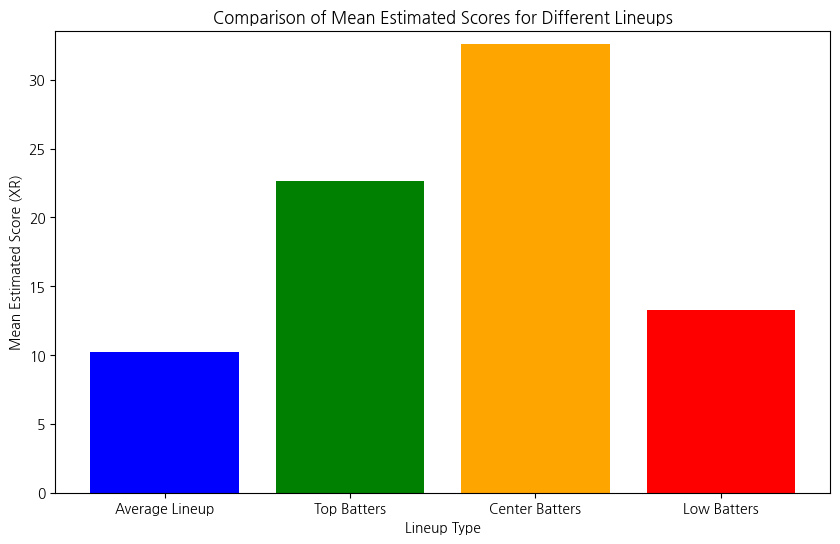

In [ ]:
lineup_names = ['Average Lineup', 'Top Batters', 'Center Batters', 'Low Batters']
mean_estimated_scores = [
    sample_lineup['추정득점'].mean(),
    sample_lineup_top['추정득점'].mean(),
    sample_lineup_center['추정득점'].mean(),
    sample_lineup_low['추정득점'].mean()
]

plt.figure(figsize=(10, 6))
plt.bar(lineup_names, mean_estimated_scores, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Lineup Type')
plt.ylabel('Mean Estimated Score (XR)')
plt.title('Comparison of Mean Estimated Scores for Different Lineups')
plt.ylim(0, max(mean_estimated_scores) + 1)
plt.show()

# KBO 2020년도

## 데이터전처리

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/13.데이터톤-19/데이터 크롤링/KBO/KBO_hitter_2020.csv')
df2 = pd.read_csv('/content/drive/MyDrive/13.데이터톤-19/데이터 크롤링/KBO/KBO_hitter_detail_2020.csv')
df3 = pd.read_csv('/content/drive/MyDrive/13.데이터톤-19/데이터 크롤링/KBO/KBO_batting_order_2020.csv')
df4 = pd.read_csv('/content/drive/MyDrive/13.데이터톤-19/데이터 크롤링/KBO/KBO_runner_2020.csv')
display(df1.head(2),df1.shape, df2.head(2),df2.shape, df3.head(2), df3.shape, df4.head(2), df4.shape)

,선수명,팀명,타율,경기,타석,타수,득점,안타,2루타,3루타,...,고의4구,사구,삼진,병살타,장타율,출루율,출루율+장타율,멀티히트,득점권타율,대타타율
0,류지혁,KIA,0.381,25,51,42,13,16,3,0.0,...,0.0,5.0,6.0,3.0,0.524,0.440,0.964,4.0,0.200,0.0
1,최형우,KIA,0.354,140,600,522,93,185,37,1.0,...,5.0,5.0,101.0,9.0,0.590,0.433,1.023,55.0,0.374,1.0


(373, 26)

,선수명,팀명,타율,장타,땅볼,뜬공,땅볼/뜬공,결승타,볼넷/삼진,투구수/타석,순수장타율,추정득점,(1.8x출루율+장타율)/4
0,류지혁,KIA,0.381,4,13,9,1.44,0,0.17,3.71,0.143,8.8,0.329
1,최형우,KIA,0.354,66,111,128,0.87,18,0.69,4.13,0.236,119.2,0.342


(373, 13)

,선수명,팀명,타율,타수,안타,2루타,3루타,홈런,타점,볼넷,사구,삼진,병살타,타순
0,고장혁,KIA,0.500,2,1,0,0,0,0,0,0,1,0,1번
1,김선빈,KIA,0.500,34,17,5,0,0,6,1,1,2,0,1번


(2472, 14)

,선수명,팀명,경기,도루시도,도루허용,도루저지,도루성공률,주루사,견제사
0,박찬호,KIA,141,23,15,8,65.2,3,0
1,최원준,KIA,123,17,14,3,82.4,5,2


(373, 9)

In [ ]:
# df1 = hitter
df1_selected = df1[['경기', '선수명', '고의4구', '희생플라이', '희생번트', '득점권타율']]

# df4 = runner
df4_selected = df4[['선수명', '도루허용', '도루저지']]

# df3에 df1과 df4의 선택된 컬럼들 병합 (df3 = batting order)
merged_df = df3.merge(df1_selected, on='선수명').merge(df4_selected, on='선수명')

# 1루타 열 계산 (안타 - 2루타 - 3루타 - 홈런)
merged_df['1루타'] = merged_df['안타'] - merged_df['2루타'] - merged_df['3루타'] - merged_df['홈런']

# 결과 출력
merged_df

,선수명,팀명,타율,타수,안타,2루타,3루타,홈런,타점,볼넷,...,병살타,타순,경기,고의4구,희생플라이,희생번트,득점권타율,도루허용,도루저지,1루타
0,고장혁,KIA,0.500,2,1,0,0,0,0,0,...,0,1번,7,0.0,0.0,0.0,0.333,0,0,1
1,고장혁,KIA,1.0,1,1,0,0,0,0,0,...,0,7번,7,0.0,0.0,0.0,0.333,0,0,1
2,고장혁,KIA,0.125,8,1,0,0,0,0,0,...,0,8번,7,0.0,0.0,0.0,0.333,0,0,1
3,고장혁,KIA,0.0,2,0,0,0,0,0,0,...,0,9번),7,0.0,0.0,0.0,0.333,0,0,0
4,고장혁,KIA,0.500,2,1,0,0,0,0,0,...,0,상위(1~2번),7,0.0,0.0,0.0,0.333,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2726,박한결,한화,0.15,20,3,0,0,0,1,2,...,2,하위(6~9번),13,0.0,0.0,2.0,0.200,0,0,3
2727,김진욱,한화,0.0,1,0,0,0,0,0,0,...,0,6번,1,0.0,0.0,0.0,0.000,0,0,0
2728,김진욱,한화,0.0,1,0,0,0,0,0,0,...,0,하위(6~9번),1,0.0,0.0,0.0,0.000,0,0,0
2729,허관회,한화,0.5,2,1,0,0,0,0,0,...,0,7번,1,0.0,0.0,0.0,0.000,0,0,1


In [ ]:
# XR 계산 함수 정의
def calculate_XR(row):
    XR = (row['1루타'] * 0.5 +
          row['2루타'] * 0.72 +
          row['3루타'] * 1.04 +
          row['홈런'] * 1.44 +
          (row['사구'] + row['볼넷'] - row['고의4구']) * 0.34 +
          row['고의4구'] * 0.25 +
          row['도루허용'] * 0.18 -
          row['도루저지'] * 0.32 -
          (row['타수'] - row['안타'] - row['삼진']) * 0.09 -
          row['삼진'] * 0.098 -
          row['병살타'] * 0.37 +
          row['희생플라이'] * 0.37 +
          row['희생번트'] * 0.04)  # 희생번트 값 추가
    return XR

# 각 선수의 XR 계산
merged_df['추정득점'] = merged_df.apply(calculate_XR, axis=1)

# 결과 출력
merged_df

,선수명,팀명,타율,타수,안타,2루타,3루타,홈런,타점,볼넷,...,타순,경기,고의4구,희생플라이,희생번트,득점권타율,도루허용,도루저지,1루타,추정득점
0,고장혁,KIA,0.500,2,1,0,0,0,0,0,...,1번,7,0.0,0.0,0.0,0.333,0,0,1,0.402
1,고장혁,KIA,1.0,1,1,0,0,0,0,0,...,7번,7,0.0,0.0,0.0,0.333,0,0,1,0.500
2,고장혁,KIA,0.125,8,1,0,0,0,0,0,...,8번,7,0.0,0.0,0.0,0.333,0,0,1,-0.154
3,고장혁,KIA,0.0,2,0,0,0,0,0,0,...,9번),7,0.0,0.0,0.0,0.333,0,0,0,-0.188
4,고장혁,KIA,0.500,2,1,0,0,0,0,0,...,상위(1~2번),7,0.0,0.0,0.0,0.333,0,0,1,0.402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2726,박한결,한화,0.15,20,3,0,0,0,1,2,...,하위(6~9번),13,0.0,0.0,2.0,0.200,0,0,3,-0.074
2727,김진욱,한화,0.0,1,0,0,0,0,0,0,...,6번,1,0.0,0.0,0.0,0.000,0,0,0,-0.098
2728,김진욱,한화,0.0,1,0,0,0,0,0,0,...,하위(6~9번),1,0.0,0.0,0.0,0.000,0,0,0,-0.098
2729,허관회,한화,0.5,2,1,0,0,0,0,0,...,7번,1,0.0,0.0,0.0,0.000,0,0,1,0.402


In [ ]:
game_mean = merged_df['경기'].mean()
game_mean

68.70670084218236

In [ ]:
KBO_2020 = merged_df[merged_df['경기'] >= game_mean]
KBO_2020.drop(columns=['타율'], axis=1, inplace=True)

KBO_2020

<ipython-input-240-8b3c456e2adb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  KBO_2020.drop(columns=['타율'], axis=1, inplace=True)


,선수명,팀명,타수,안타,2루타,3루타,홈런,타점,볼넷,사구,...,타순,경기,고의4구,희생플라이,희생번트,득점권타율,도루허용,도루저지,1루타,추정득점
6,김선빈,KIA,34,17,5,0,0,6,1,1,...,1번,85,0.0,5.0,1.0,0.345,1,1,12,10.484
7,김선빈,KIA,239,73,12,0,1,29,33,1,...,2번,85,0.0,5.0,1.0,0.345,1,1,60,34.084
8,김선빈,KIA,13,5,1,0,0,0,4,0,...,3번,85,0.0,5.0,1.0,0.345,1,1,4,5.094
9,김선빈,KIA,3,1,0,0,0,1,0,0,...,4번,85,0.0,5.0,1.0,0.345,1,1,1,1.700
10,김선빈,KIA,8,2,1,0,0,1,2,0,...,6번,85,0.0,5.0,1.0,0.345,1,1,1,3.094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2714,반즈,한화,4,1,0,0,1,1,1,1,...,5번,74,1.0,2.0,0.0,0.348,2,1,0,2.524
2715,반즈,한화,33,7,1,0,1,4,2,0,...,6번,74,1.0,2.0,0.0,0.348,2,1,5,3.610
2716,반즈,한화,12,3,1,0,1,4,0,0,...,7번,74,1.0,2.0,0.0,0.348,2,1,1,2.532
2717,반즈,한화,238,65,15,1,7,34,25,7,...,중심(3~5번),74,1.0,2.0,0.0,0.348,2,1,42,36.880


## 샘플

In [ ]:
# 샘플 선수 생성 (평균 값 사용)
sample_player = KBO_2020.mean(numeric_only=True).to_dict()
sample_player['선수명'] = '샘플선수'
sample_player['팀명'] = 'KBO'
sample_player['타순'] = None

sample_player

{'타수': 63.80345086271568,
 '안타': 17.813953488372093,
 '2루타': 3.09377344336084,
 '3루타': 0.2595648912228057,
 '홈런': 1.8424606151537883,
 '타점': 9.366841710427607,
 '볼넷': 6.952738184546137,
 '사구': 0.9437359339834959,
 '삼진': 11.95198799699925,
 '병살타': 1.509377344336084,
 '경기': 108.50037509377344,
 '고의4구': 1.0114848236259228,
 '희생플라이': 2.767022149302707,
 '희생번트': 3.036095159967186,
 '득점권타율': 0.2729909762100082,
 '도루허용': 5.845461365341335,
 '도루저지': 2.5048762190547635,
 '1루타': 12.61815453863466,
 '추정득점': 10.34174241181296,
 '선수명': '샘플선수',
 '팀명': 'KBO',
 '타순': None}

In [ ]:
sample_lineup = pd.DataFrame([sample_player] * 9)
sample_lineup['타순'] = range(1, 10)

column_order = ['선수명', '팀명', '타수', '안타', '2루타', '3루타', '홈런', '타점', '볼넷', '사구',
                '삼진', '병살타', '타순', '경기', '고의4구', '희생플라이', '희생번트', '득점권타율', '도루허용',
                '도루저지', '1루타', '추정득점']
sample_lineup = sample_lineup[column_order]

In [ ]:
sample_lineup.drop(['안타', '2루타', '3루타', '홈런', '타점', '볼넷', '사구',
                '삼진', '병살타', '고의4구', '희생플라이', '희생번트','도루허용',
                '도루저지', '1루타'], axis=1, inplace=True)
sample_lineup

,선수명,팀명,타수,타순,경기,득점권타율,추정득점
0,샘플선수,KBO,63.803451,1,108.500375,0.272991,10.341742
1,샘플선수,KBO,63.803451,2,108.500375,0.272991,10.341742
2,샘플선수,KBO,63.803451,3,108.500375,0.272991,10.341742
3,샘플선수,KBO,63.803451,4,108.500375,0.272991,10.341742
4,샘플선수,KBO,63.803451,5,108.500375,0.272991,10.341742
5,샘플선수,KBO,63.803451,6,108.500375,0.272991,10.341742
6,샘플선수,KBO,63.803451,7,108.500375,0.272991,10.341742
7,샘플선수,KBO,63.803451,8,108.500375,0.272991,10.341742
8,샘플선수,KBO,63.803451,9,108.500375,0.272991,10.341742


## 상위타순

In [ ]:
# '타순' 열의 값이 '1번', '2번', '상위(1~2번)'인 행만 선택
table_batters = KBO_2020[KBO_2020['타순'].isin(['1번', '2번', '상위(1~2번)'])]

# 결과 확인
table_batters

,선수명,팀명,타수,안타,2루타,3루타,홈런,타점,볼넷,사구,...,타순,경기,고의4구,희생플라이,희생번트,득점권타율,도루허용,도루저지,1루타,추정득점
6,김선빈,KIA,34,17,5,0,0,6,1,1,...,1번,85,0.0,5.0,1.0,0.345,1,1,12,10.484
7,김선빈,KIA,239,73,12,0,1,29,33,1,...,2번,85,0.0,5.0,1.0,0.345,1,1,60,34.084
13,김선빈,KIA,273,90,17,0,1,35,34,2,...,상위(1~2번),85,0.0,5.0,1.0,0.345,1,1,72,42.818
16,김태진,KIA,11,4,0,0,0,0,1,0,...,1번,82,0.0,1.0,2.0,0.284,7,4,4,2.116
17,김태진,KIA,1,0,0,0,0,0,0,0,...,2번,82,0.0,1.0,2.0,0.284,7,4,0,0.332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2634,하주석,한화,19,7,1,0,0,3,1,0,...,상위(1~2번),72,0.0,2.0,2.0,0.306,4,1,6,4.160
2637,강경학,한화,55,14,2,0,2,11,9,0,...,2번,94,0.0,2.0,5.0,0.182,1,2,10,9.002
2645,강경학,한화,55,14,2,0,2,11,9,0,...,상위(1~2번),94,0.0,2.0,5.0,0.182,1,2,10,9.002
2648,송광민,한화,9,2,1,0,0,2,1,0,...,2번,94,1.0,3.0,1.0,0.270,0,0,1,1.588


In [ ]:
# 득점권 타율이 높은 선수  선택
top_avg_players_table = table_batters.nlargest(30, '득점권타율')
# 추정 득점이 높은 순으로 정렬
top_avg_players_table_sorted = top_avg_players_table.sort_values(by='추정득점', ascending=False)
top_avg_players_table_sorted
# 선수명 중복 없이 상위 2명 선택
top_2_unique_players_table = top_avg_players_table_sorted.drop_duplicates(subset='선수명').head(2)
top_2_unique_players_table

,선수명,팀명,타수,안타,2루타,3루타,홈런,타점,볼넷,사구,...,타순,경기,고의4구,희생플라이,희생번트,득점권타율,도루허용,도루저지,1루타,추정득점
784,박민우,NC,336,110,22,2,4,32,27,8,...,상위(1~2번),126,2.0,10.0,2.0,0.388,13,6,82,57.036
1696,정훈,롯데,312,91,14,1,9,43,39,3,...,상위(1~2번),111,0.0,4.0,2.0,0.357,11,1,67,52.096


In [ ]:
top_2_unique_players_table.drop(['안타', '2루타', '3루타', '홈런', '타점', '볼넷', '사구',
                '삼진', '병살타', '고의4구', '희생플라이', '희생번트','도루허용',
                '도루저지', '1루타'], axis=1, inplace=True)
top_2_unique_players_table

,선수명,팀명,타수,타순,경기,득점권타율,추정득점
784,박민우,NC,336,상위(1~2번),126,0.388,57.036
1696,정훈,롯데,312,상위(1~2번),111,0.357,52.096


In [ ]:
# Align columns of top_2_unique_players_table to match sample_lineup
top_2_unique_players_table = top_2_unique_players_table.reindex(columns=sample_lineup.columns, fill_value=None)

In [ ]:
# Insert top 2 unique players into the 1st and 2nd positions of sample_lineup
sample_lineup_top = sample_lineup.copy()
for i in range(2):
    sample_lineup_top.iloc[0 + i, :len(top_2_unique_players_table.columns)] = top_2_unique_players_table.iloc[i, :].values

sample_lineup_top

,선수명,팀명,타수,타순,경기,득점권타율,추정득점
0,박민우,NC,336.000000,상위(1~2번),126.000000,0.388000,57.036000
1,정훈,롯데,312.000000,상위(1~2번),111.000000,0.357000,52.096000
2,샘플선수,KBO,63.803451,3,108.500375,0.272991,10.341742
3,샘플선수,KBO,63.803451,4,108.500375,0.272991,10.341742
4,샘플선수,KBO,63.803451,5,108.500375,0.272991,10.341742
5,샘플선수,KBO,63.803451,6,108.500375,0.272991,10.341742
6,샘플선수,KBO,63.803451,7,108.500375,0.272991,10.341742
7,샘플선수,KBO,63.803451,8,108.500375,0.272991,10.341742
8,샘플선수,KBO,63.803451,9,108.500375,0.272991,10.341742


In [ ]:
print(sample_lineup['추정득점'].mean(),
      sample_lineup_low['추정득점'].mean())

10.34174241181296 13.265137254901958


## 중위타순

In [ ]:
# '타순' 열의 값이 '3번', '4번', '5번', '중심(3~5번)'인 행만 선택
center_batters = KBO_2020[KBO_2020['타순'].isin(['3번', '4번', '5번', '중심(3~5번)'])]

# 결과 확인
center_batters

,선수명,팀명,타수,안타,2루타,3루타,홈런,타점,볼넷,사구,...,타순,경기,고의4구,희생플라이,희생번트,득점권타율,도루허용,도루저지,1루타,추정득점
8,김선빈,KIA,13,5,1,0,0,0,4,0,...,3번,85,0.0,5.0,1.0,0.345,1,1,4,5.094
9,김선빈,KIA,3,1,0,0,0,1,0,0,...,4번,85,0.0,5.0,1.0,0.345,1,1,1,1.700
14,김선빈,KIA,16,6,1,0,0,1,4,0,...,중심(3~5번),85,0.0,5.0,1.0,0.345,1,1,5,5.044
18,김태진,KIA,27,5,0,1,0,3,2,0,...,5번,82,0.0,1.0,2.0,0.284,7,4,4,1.776
24,김태진,KIA,27,5,0,1,0,3,2,0,...,중심(3~5번),82,0.0,1.0,2.0,0.284,7,4,4,1.776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2693,이해창,한화,19,6,0,0,0,4,3,0,...,중심(3~5번),70,0.0,2.0,1.0,0.391,0,2,6,2.588
2712,반즈,한화,54,12,2,0,1,7,9,2,...,3번,74,1.0,2.0,0.0,0.348,2,1,9,7.524
2713,반즈,한화,180,52,13,1,5,26,15,4,...,4번,74,1.0,2.0,0.0,0.348,2,1,33,28.212
2714,반즈,한화,4,1,0,0,1,1,1,1,...,5번,74,1.0,2.0,0.0,0.348,2,1,0,2.524


In [ ]:
# 득점권 타율이 높은 선수 선택
top_avg_players_center = center_batters.nlargest(30, '득점권타율')
# 추정 득점이 높은 순으로 정렬
top_avg_players_center_sorted = top_avg_players_center.sort_values(by='추정득점', ascending=False)
top_avg_players_center_sorted
# 선수명 중복 없이 상위 선택
top_3_unique_players_center = top_avg_players_center_sorted.drop_duplicates(subset='선수명').head(3)
top_3_unique_players_center

,선수명,팀명,타수,안타,2루타,3루타,홈런,타점,볼넷,사구,...,타순,경기,고의4구,희생플라이,희생번트,득점권타율,도루허용,도루저지,1루타,추정득점
186,최형우,KIA,521,184,36,1,28,114,70,5,...,중심(3~5번),140,5.0,3.0,0.0,0.374,0,0,119,118.472
747,양의지,NC,448,147,26,1,32,119,45,14,...,중심(3~5번),130,7.0,6.0,1.0,0.425,5,2,88,100.254
578,김현수,LG,390,124,20,1,17,90,47,2,...,중심(3~5번),142,7.0,7.0,0.0,0.446,0,2,86,74.428


In [ ]:
top_3_unique_players_center.drop(['안타', '2루타', '3루타', '홈런', '타점', '볼넷', '사구',
                '삼진', '병살타', '고의4구', '희생플라이', '희생번트','도루허용',
                '도루저지', '1루타'], axis=1, inplace=True)
top_3_unique_players_center

,선수명,팀명,타수,타순,경기,득점권타율,추정득점
186,최형우,KIA,521,중심(3~5번),140,0.374,118.472
747,양의지,NC,448,중심(3~5번),130,0.425,100.254
578,김현수,LG,390,중심(3~5번),142,0.446,74.428


In [ ]:
# sample_lineup의 3, 4, 5번 자리에 top_3_unique_players 넣기
# Adjusting the columns of the top 3 players to match the sample lineup structure
top_3_unique_players_center_adjusted = top_3_unique_players_center.reindex(columns=sample_lineup.columns)

# Creating a copy of sample lineup
sample_lineup_center = sample_lineup.copy()

# Replacing the 3rd, 4th, and 5th positions with the top 3 unique players
for i in range(3):
    sample_lineup_center.iloc[2 + i, :] = top_3_unique_players_center_adjusted.iloc[i, :].values


sample_lineup_center

,선수명,팀명,타수,타순,경기,득점권타율,추정득점
0,샘플선수,KBO,63.803451,1,108.500375,0.272991,10.341742
1,샘플선수,KBO,63.803451,2,108.500375,0.272991,10.341742
2,최형우,KIA,521.000000,중심(3~5번),140.000000,0.374000,118.472000
3,양의지,NC,448.000000,중심(3~5번),130.000000,0.425000,100.254000
4,김현수,LG,390.000000,중심(3~5번),142.000000,0.446000,74.428000
5,샘플선수,KBO,63.803451,6,108.500375,0.272991,10.341742
6,샘플선수,KBO,63.803451,7,108.500375,0.272991,10.341742
7,샘플선수,KBO,63.803451,8,108.500375,0.272991,10.341742
8,샘플선수,KBO,63.803451,9,108.500375,0.272991,10.341742


In [ ]:
print(sample_lineup['추정득점'].mean(),
      sample_lineup_center['추정득점'].mean())

10.34174241181296 39.46716160787531


## 하위타순

In [ ]:
# '타순' 열의 값이 '6번', '7번', '8번','9번' '하위(6~9번)'인 행만 선택
low_batters = KBO_2020[KBO_2020['타순'].isin(['6번', '7번', '8번','9번' '하위(6~9번)'])]

# 결과 확인
low_batters

,선수명,팀명,타수,안타,2루타,3루타,홈런,타점,볼넷,사구,...,타순,경기,고의4구,희생플라이,희생번트,득점권타율,도루허용,도루저지,1루타,추정득점
10,김선빈,KIA,8,2,1,0,0,1,2,0,...,6번,85,0.0,5.0,1.0,0.345,1,1,1,3.094
11,김선빈,KIA,3,1,0,0,0,0,0,0,...,7번,85,0.0,5.0,1.0,0.345,1,1,1,2.070
19,김태진,KIA,79,18,1,0,0,6,3,0,...,6번,82,0.0,1.0,2.0,0.284,7,4,17,5.036
20,김태진,KIA,57,13,2,0,0,7,4,1,...,7번,82,0.0,1.0,2.0,0.284,7,4,11,5.086
21,김태진,KIA,52,13,1,0,0,2,2,0,...,8번,82,0.0,1.0,2.0,0.284,7,4,12,3.878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2689,이해창,한화,27,5,2,0,0,4,1,1,...,6번,70,0.0,2.0,1.0,0.391,0,2,3,0.646
2690,이해창,한화,17,6,0,0,2,6,2,2,...,7번,70,0.0,2.0,1.0,0.391,0,2,4,5.004
2691,이해창,한화,48,10,3,0,0,1,2,0,...,8번,70,0.0,2.0,1.0,0.391,0,2,7,2.602
2715,반즈,한화,33,7,1,0,1,4,2,0,...,6번,74,1.0,2.0,0.0,0.348,2,1,5,3.610


In [ ]:
# 득점권 타율이 높은 선수 선택
top_avg_players_low = low_batters.nlargest(30, '득점권타율')
# 추정 득점이 높은 순으로 정렬
top_avg_players_low_sorted = top_avg_players_low.sort_values(by='추정득점', ascending=False)
top_avg_players_low_sorted
# 선수명 중복 없이 상위 선택
top_4_unique_players_low = top_avg_players_low_sorted.drop_duplicates(subset='선수명').head(4)
top_4_unique_players_low

,선수명,팀명,타수,안타,2루타,3루타,홈런,타점,볼넷,사구,...,타순,경기,고의4구,희생플라이,희생번트,득점권타율,도루허용,도루저지,1루타,추정득점
725,유강남,LG,263,71,15,0,8,48,24,8,...,8번,137,1.0,2.0,2.0,0.352,1,1,48,35.300
2191,김혜성,키움,157,40,7,2,4,23,15,1,...,7번,142,0.0,4.0,2.0,0.366,25,8,27,24.470
1693,정훈,롯데,53,19,3,0,1,10,10,1,...,6번,111,0.0,4.0,2.0,0.357,11,1,15,14.912
30,최원준,KIA,23,6,1,0,0,5,1,0,...,6번,123,0.0,5.0,9.0,0.364,14,3,5,5.776


In [ ]:
top_4_unique_players_low.drop(['안타', '2루타', '3루타', '홈런', '타점', '볼넷', '사구',
                '삼진', '병살타', '고의4구', '희생플라이', '희생번트','도루허용',
                '도루저지', '1루타'], axis=1, inplace=True)
top_4_unique_players_low

,선수명,팀명,타수,타순,경기,득점권타율,추정득점
725,유강남,LG,263,8번,137,0.352,35.300
2191,김혜성,키움,157,7번,142,0.366,24.470
1693,정훈,롯데,53,6번,111,0.357,14.912
30,최원준,KIA,23,6번,123,0.364,5.776


In [ ]:
# sample_lineup의 열과 맞추기 위해 top_4_unique_players_low의 열 정리
sample_lineup_columns = sample_lineup.columns
top_4_unique_players_low = top_4_unique_players_low[sample_lineup_columns]

In [ ]:
# sample_lineup의 6, 7, 8, 9번 자리에 top_4_unique_players 넣기
sample_lineup_low = sample_lineup.copy()
for i in range(4):
    sample_lineup_low.iloc[5 + i, :] = top_4_unique_players_low.iloc[i, :].values

# 결과 확인
sample_lineup_low

,선수명,팀명,타수,타순,경기,득점권타율,추정득점
0,샘플선수,KBO,63.803451,1,108.500375,0.272991,10.341742
1,샘플선수,KBO,63.803451,2,108.500375,0.272991,10.341742
2,샘플선수,KBO,63.803451,3,108.500375,0.272991,10.341742
3,샘플선수,KBO,63.803451,4,108.500375,0.272991,10.341742
4,샘플선수,KBO,63.803451,5,108.500375,0.272991,10.341742
5,유강남,LG,263.000000,8번,137.000000,0.352000,35.300000
6,김혜성,키움,157.000000,7번,142.000000,0.366000,24.470000
7,정훈,롯데,53.000000,6번,111.000000,0.357000,14.912000
8,최원준,KIA,23.000000,6번,123.000000,0.364000,5.776000


In [ ]:
print(sample_lineup['추정득점'].mean(),
      sample_lineup_low['추정득점'].mean())

10.34174241181296 14.685190228784977


## 시각화

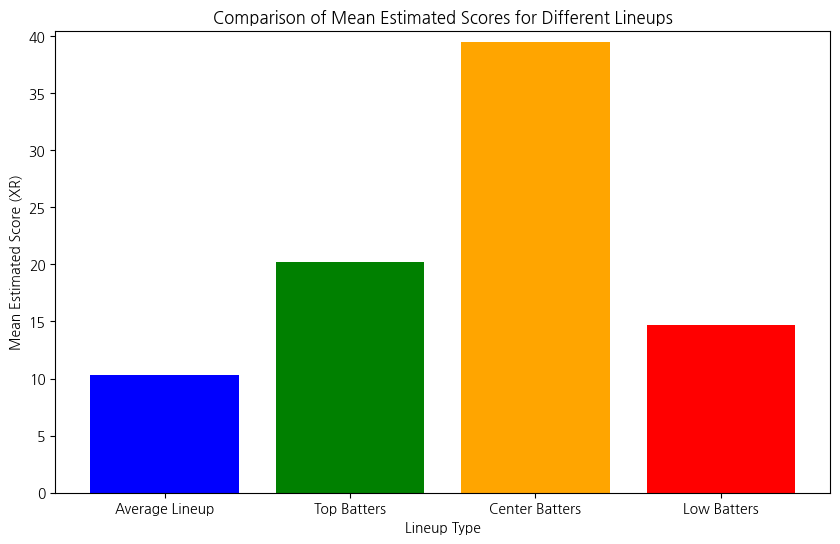

In [ ]:
lineup_names = ['Average Lineup', 'Top Batters', 'Center Batters', 'Low Batters']
mean_estimated_scores = [
    sample_lineup['추정득점'].mean(),
    sample_lineup_top['추정득점'].mean(),
    sample_lineup_center['추정득점'].mean(),
    sample_lineup_low['추정득점'].mean()
]

plt.figure(figsize=(10, 6))
plt.bar(lineup_names, mean_estimated_scores, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Lineup Type')
plt.ylabel('Mean Estimated Score (XR)')
plt.title('Comparison of Mean Estimated Scores for Different Lineups')
plt.ylim(0, max(mean_estimated_scores) + 1)
plt.show()

# KBO 2019년도

## 데이터전처리

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/13.데이터톤-19/데이터 크롤링/KBO/KBO_hitter_2019.csv')
df2 = pd.read_csv('/content/drive/MyDrive/13.데이터톤-19/데이터 크롤링/KBO/KBO_hitter_detail_2019.csv')
df3 = pd.read_csv('/content/drive/MyDrive/13.데이터톤-19/데이터 크롤링/KBO/KBO_batting_order_2019.csv')
df4 = pd.read_csv('/content/drive/MyDrive/13.데이터톤-19/데이터 크롤링/KBO/KBO_runner_2019.csv')
display(df1.head(2),df1.shape, df2.head(2),df2.shape, df3.head(2), df3.shape, df4.head(2), df4.shape)

,선수명,팀명,타율,경기,타석,타수,득점,안타,2루타,3루타,...,고의4구,사구,삼진,병살타,장타율,출루율,출루율+장타율,멀티히트,득점권타율,대타타율
0,안치홍,KIA,0.315,105,408,362,45,114,18,1.0,...,1.0,1.0,37.0,9.0,0.412,0.380,0.792,32.0,0.234,0.2
1,터커,KIA,0.311,95,399,357,50,111,33,0.0,...,0.0,3.0,44.0,12.0,0.479,0.381,0.860,29.0,0.293,0.0


(353, 26)

,선수명,팀명,타율,장타,땅볼,뜬공,땅볼/뜬공,결승타,볼넷/삼진,투구수/타석,순수장타율,추정득점,(1.8x출루율+장타율)/4
0,안치홍,KIA,0.315,24,107,109,0.98,5,1.08,3.56,0.097,56.0,0.274
1,터커,KIA,0.311,42,98,105,0.93,10,0.86,3.97,0.168,58.6,0.291


(353, 13)

,선수명,팀명,타율,타수,안타,2루타,3루타,홈런,타점,볼넷,사구,삼진,병살타,타순
0,이우성,KIA,0.500,4,2,0,0,0,1,1,0,1,0,1번
1,류승현,KIA,0.444,9,4,0,0,0,0,0,0,2,0,1번


(2310, 14)

,선수명,팀명,경기,도루시도,도루허용,도루저지,도루성공률,주루사,견제사
0,박찬호,KIA,133,45,39,6,86.7,8,3
1,이창진,KIA,133,16,8,8,50.0,3,1


(353, 9)

In [ ]:
# df1 = hitter
df1_selected = df1[['경기', '선수명', '고의4구', '희생플라이', '희생번트', '득점권타율']]

# df4 = runner
df4_selected = df4[['선수명', '도루허용', '도루저지']]

# df3에 df1과 df4의 선택된 컬럼들 병합 (df3 = batting order)
merged_df = df3.merge(df1_selected, on='선수명').merge(df4_selected, on='선수명')

# 1루타 열 계산 (안타 - 2루타 - 3루타 - 홈런)
merged_df['1루타'] = merged_df['안타'] - merged_df['2루타'] - merged_df['3루타'] - merged_df['홈런']

# 결과 출력
merged_df

,선수명,팀명,타율,타수,안타,2루타,3루타,홈런,타점,볼넷,...,병살타,타순,경기,고의4구,희생플라이,희생번트,득점권타율,도루허용,도루저지,1루타
0,이우성,KIA,0.500,4,2,0,0,0,1,1,...,0,1번,60,0.0,2.0,1.0,0.239,0,0,2
1,이우성,KIA,0.500,4,2,2,0,0,0,0,...,0,2번,60,0.0,2.0,1.0,0.239,0,0,0
2,이우성,KIA,0.5,6,3,1,0,0,2,1,...,0,3번,60,0.0,2.0,1.0,0.239,0,0,2
3,이우성,KIA,0.25,8,2,0,0,0,0,0,...,0,4번,60,0.0,2.0,1.0,0.239,0,0,2
4,이우성,KIA,0.136,22,3,0,0,2,5,2,...,1,5번,60,0.0,2.0,1.0,0.239,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2404,김창혁,한화,0.000,1,0,0,0,0,0,0,...,0,7번,3,0.0,0.0,0.0,0.000,0,0,0
2405,김창혁,한화,0.000,1,0,0,0,0,0,0,...,0,8번,3,0.0,0.0,0.0,0.000,0,0,0
2406,김창혁,한화,0.0,2,0,0,0,0,0,0,...,0,하위(6~9번),3,0.0,0.0,0.0,0.000,0,0,0
2407,박준혁,한화,0.000,2,0,0,0,0,0,0,...,0,7번,4,0.0,0.0,0.0,0.000,0,0,0


In [ ]:
# XR 계산 함수 정의
def calculate_XR(row):
    XR = (row['1루타'] * 0.5 +
          row['2루타'] * 0.72 +
          row['3루타'] * 1.04 +
          row['홈런'] * 1.44 +
          (row['사구'] + row['볼넷'] - row['고의4구']) * 0.34 +
          row['고의4구'] * 0.25 +
          row['도루허용'] * 0.18 -
          row['도루저지'] * 0.32 -
          (row['타수'] - row['안타'] - row['삼진']) * 0.09 -
          row['삼진'] * 0.098 -
          row['병살타'] * 0.37 +
          row['희생플라이'] * 0.37 +
          row['희생번트'] * 0.04)  # 희생번트 값 추가
    return XR

# 각 선수의 XR 계산
merged_df['추정득점'] = merged_df.apply(calculate_XR, axis=1)

# 결과 출력
merged_df

,선수명,팀명,타율,타수,안타,2루타,3루타,홈런,타점,볼넷,...,타순,경기,고의4구,희생플라이,희생번트,득점권타율,도루허용,도루저지,1루타,추정득점
0,이우성,KIA,0.500,4,2,0,0,0,1,1,...,1번,60,0.0,2.0,1.0,0.239,0,0,2,1.932
1,이우성,KIA,0.500,4,2,2,0,0,0,0,...,2번,60,0.0,2.0,1.0,0.239,0,0,0,2.040
2,이우성,KIA,0.5,6,3,1,0,0,2,1,...,3번,60,0.0,2.0,1.0,0.239,0,0,2,2.562
3,이우성,KIA,0.25,8,2,0,0,0,0,0,...,4번,60,0.0,2.0,1.0,0.239,0,0,2,1.224
4,이우성,KIA,0.136,22,3,0,0,2,5,2,...,5번,60,0.0,2.0,1.0,0.239,0,0,1,2.704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2404,김창혁,한화,0.000,1,0,0,0,0,0,0,...,7번,3,0.0,0.0,0.0,0.000,0,0,0,-0.098
2405,김창혁,한화,0.000,1,0,0,0,0,0,0,...,8번,3,0.0,0.0,0.0,0.000,0,0,0,-0.090
2406,김창혁,한화,0.0,2,0,0,0,0,0,0,...,하위(6~9번),3,0.0,0.0,0.0,0.000,0,0,0,-0.188
2407,박준혁,한화,0.000,2,0,0,0,0,0,0,...,7번,4,0.0,0.0,0.0,0.000,0,0,0,-0.188


In [ ]:
game_mean = merged_df['경기'].mean()
game_mean

69.31299294312993

In [ ]:
KBO_2019 = merged_df[merged_df['경기'] >= game_mean]
KBO_2019.drop(columns=['타율'], axis=1, inplace=True)

KBO_2019

<ipython-input-266-32ed3258c012>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  KBO_2019.drop(columns=['타율'], axis=1, inplace=True)


,선수명,팀명,타수,안타,2루타,3루타,홈런,타점,볼넷,사구,...,타순,경기,고의4구,희생플라이,희생번트,득점권타율,도루허용,도루저지,1루타,추정득점
23,터커,KIA,5,2,1,0,0,0,0,0,...,1번,95,0.0,1.0,0.0,0.293,0,0,1,1.320
24,터커,KIA,315,97,28,0,8,44,29,2,...,3번,95,0.0,1.0,0.0,0.293,0,0,61,48.742
25,터커,KIA,13,5,3,0,1,3,2,0,...,4번,95,0.0,1.0,0.0,0.293,0,0,1,4.414
26,터커,KIA,22,5,1,0,0,1,3,1,...,5번,95,0.0,1.0,0.0,0.293,0,0,4,2.872
27,터커,KIA,2,2,0,0,0,2,3,0,...,6번,95,0.0,1.0,0.0,0.293,0,0,2,2.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2373,최재훈,한화,134,36,7,0,1,14,22,5,...,7번,135,0.0,4.0,4.0,0.225,3,10,28,18.896
2374,최재훈,한화,184,55,8,0,1,12,29,7,...,8번,135,0.0,4.0,4.0,0.225,3,10,46,27.358
2375,최재훈,한화,15,5,1,0,0,1,0,1,...,9번,135,0.0,4.0,4.0,0.225,3,10,4,1.116
2376,최재훈,한화,1,0,0,0,0,0,0,0,...,상위(1~2번),135,0.0,4.0,4.0,0.225,3,10,0,-1.110


## 샘플

In [ ]:
# 샘플 선수 생성 (평균 값 사용)
sample_player = KBO_2019.mean(numeric_only=True).to_dict()
sample_player['선수명'] = '샘플선수'
sample_player['팀명'] = 'KBO'
sample_player['타순'] = None

sample_player

{'타수': 73.8755635707845,
 '안타': 20.409377817853922,
 '2루타': 3.543733092876465,
 '3루타': 0.3624887285843102,
 '홈런': 1.5906221821460775,
 '타점': 9.614066726780884,
 '볼넷': 7.328223624887285,
 '사구': 1.085662759242561,
 '삼진': 13.365193868349865,
 '병살타': 1.69702434625789,
 '경기': 114.3751127141569,
 '고의4구': 1.0816733067729083,
 '희생플라이': 3.3695219123505975,
 '희생번트': 3.047808764940239,
 '득점권타율': 0.2675308764940239,
 '도루허용': 7.512173128944996,
 '도루저지': 3.1235347159603246,
 '1루타': 14.91253381424707,
 '추정득점': 11.355332669322708,
 '선수명': '샘플선수',
 '팀명': 'KBO',
 '타순': None}

In [ ]:
sample_lineup = pd.DataFrame([sample_player] * 9)
sample_lineup['타순'] = range(1, 10)

column_order = ['선수명', '팀명', '타수', '안타', '2루타', '3루타', '홈런', '타점', '볼넷', '사구',
                '삼진', '병살타', '타순', '경기', '고의4구', '희생플라이', '희생번트', '득점권타율', '도루허용',
                '도루저지', '1루타', '추정득점']
sample_lineup = sample_lineup[column_order]

In [ ]:
sample_lineup.drop(['안타', '2루타', '3루타', '홈런', '타점', '볼넷', '사구',
                '삼진', '병살타', '고의4구', '희생플라이', '희생번트','도루허용',
                '도루저지', '1루타'], axis=1, inplace=True)
sample_lineup

,선수명,팀명,타수,타순,경기,득점권타율,추정득점
0,샘플선수,KBO,73.875564,1,114.375113,0.267531,11.355333
1,샘플선수,KBO,73.875564,2,114.375113,0.267531,11.355333
2,샘플선수,KBO,73.875564,3,114.375113,0.267531,11.355333
3,샘플선수,KBO,73.875564,4,114.375113,0.267531,11.355333
4,샘플선수,KBO,73.875564,5,114.375113,0.267531,11.355333
5,샘플선수,KBO,73.875564,6,114.375113,0.267531,11.355333
6,샘플선수,KBO,73.875564,7,114.375113,0.267531,11.355333
7,샘플선수,KBO,73.875564,8,114.375113,0.267531,11.355333
8,샘플선수,KBO,73.875564,9,114.375113,0.267531,11.355333


## 상위타순

In [ ]:
# '타순' 열의 값이 '1번', '2번', '상위(1~2번)'인 행만 선택
table_batters = KBO_2019[KBO_2019['타순'].isin(['1번', '2번', '상위(1~2번)'])]

# 결과 확인
table_batters

,선수명,팀명,타수,안타,2루타,3루타,홈런,타점,볼넷,사구,...,타순,경기,고의4구,희생플라이,희생번트,득점권타율,도루허용,도루저지,1루타,추정득점
23,터커,KIA,5,2,1,0,0,0,0,0,...,1번,95,0.0,1.0,0.0,0.293,0,0,1,1.320
29,터커,KIA,5,2,1,0,0,0,0,0,...,상위(1~2번),95,0.0,1.0,0.0,0.293,0,0,1,1.320
32,김주찬,KIA,105,34,9,0,1,10,9,0,...,1번,100,3.0,3.0,1.0,0.250,3,1,24,17.570
33,김주찬,KIA,39,12,0,0,0,3,2,1,...,2번,100,3.0,3.0,1.0,0.250,3,1,12,5.264
40,김주찬,KIA,144,46,9,0,1,13,11,1,...,상위(1~2번),100,3.0,3.0,1.0,0.250,3,1,36,21.734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2319,노시환,한화,2,1,0,0,0,0,0,0,...,상위(1~2번),91,0.0,1.0,1.0,0.205,2,2,1,0.540
2335,송광민,한화,29,5,3,0,0,2,2,0,...,2번,122,0.0,5.0,3.0,0.261,8,2,2,4.024
2341,송광민,한화,29,5,3,0,0,2,2,0,...,상위(1~2번),122,0.0,5.0,3.0,0.261,8,2,2,4.024
2371,최재훈,한화,1,0,0,0,0,0,0,0,...,2번,135,0.0,4.0,4.0,0.225,3,10,0,-1.110


In [ ]:
# 득점권 타율이 높은 선수  선택
top_avg_players_table = table_batters.nlargest(30, '득점권타율')
# 추정 득점이 높은 순으로 정렬
top_avg_players_table_sorted = top_avg_players_table.sort_values(by='추정득점', ascending=False)
top_avg_players_table_sorted
# 선수명 중복 없이 상위 2명 선택
top_2_unique_players_table = top_avg_players_table_sorted.drop_duplicates(subset='선수명').head(2)
top_2_unique_players_table

,선수명,팀명,타수,안타,2루타,3루타,홈런,타점,볼넷,사구,...,타순,경기,고의4구,희생플라이,희생번트,득점권타율,도루허용,도루저지,1루타,추정득점
2020,김하성,키움,417,122,27,2,14,68,58,6,...,상위(1~2번),139,4.0,7.0,1.0,0.364,33,4,79,79.896
508,이천웅,LG,533,163,23,3,2,46,57,5,...,상위(1~2번),138,1.0,1.0,4.0,0.333,21,10,135,73.788


In [ ]:
top_2_unique_players_table.drop(['안타', '2루타', '3루타', '홈런', '타점', '볼넷', '사구',
                '삼진', '병살타', '고의4구', '희생플라이', '희생번트','도루허용',
                '도루저지', '1루타'], axis=1, inplace=True)
top_2_unique_players_table

,선수명,팀명,타수,타순,경기,득점권타율,추정득점
2020,김하성,키움,417,상위(1~2번),139,0.364,79.896
508,이천웅,LG,533,상위(1~2번),138,0.333,73.788


In [ ]:
# Align columns of top_2_unique_players_table to match sample_lineup
top_2_unique_players_table = top_2_unique_players_table.reindex(columns=sample_lineup.columns, fill_value=None)

In [ ]:
sample_lineup_top = sample_lineup.copy()
# Insert top 2 unique players into the 1st and 2nd positions of sample_lineup
for i in range(2):
    sample_lineup_top.iloc[0 + i, :len(top_2_unique_players_table.columns)] = top_2_unique_players_table.iloc[i, :].values

sample_lineup_top

,선수명,팀명,타수,타순,경기,득점권타율,추정득점
0,김하성,키움,417.000000,상위(1~2번),139.000000,0.364000,79.896000
1,이천웅,LG,533.000000,상위(1~2번),138.000000,0.333000,73.788000
2,샘플선수,KBO,73.875564,3,114.375113,0.267531,11.355333
3,샘플선수,KBO,73.875564,4,114.375113,0.267531,11.355333
4,샘플선수,KBO,73.875564,5,114.375113,0.267531,11.355333
5,샘플선수,KBO,73.875564,6,114.375113,0.267531,11.355333
6,샘플선수,KBO,73.875564,7,114.375113,0.267531,11.355333
7,샘플선수,KBO,73.875564,8,114.375113,0.267531,11.355333
8,샘플선수,KBO,73.875564,9,114.375113,0.267531,11.355333


In [ ]:
print(sample_lineup['추정득점'].mean(),
      sample_lineup_low['추정득점'].mean())

11.355332669322708 14.685190228784977


## 중위타순

In [ ]:
# '타순' 열의 값이 '3번', '4번', '5번', '중심(3~5번)'인 행만 선택
center_batters = KBO_2019[KBO_2019['타순'].isin(['3번', '4번', '5번', '중심(3~5번)'])]

# 결과 확인
center_batters

,선수명,팀명,타수,안타,2루타,3루타,홈런,타점,볼넷,사구,...,타순,경기,고의4구,희생플라이,희생번트,득점권타율,도루허용,도루저지,1루타,추정득점
24,터커,KIA,315,97,28,0,8,44,29,2,...,3번,95,0.0,1.0,0.0,0.293,0,0,61,48.742
25,터커,KIA,13,5,3,0,1,3,2,0,...,4번,95,0.0,1.0,0.0,0.293,0,0,1,4.414
26,터커,KIA,22,5,1,0,0,1,3,1,...,5번,95,0.0,1.0,0.0,0.293,0,0,4,2.872
30,터커,KIA,350,107,32,0,9,48,34,3,...,중심(3~5번),95,0.0,1.0,0.0,0.293,0,0,66,55.288
34,김주찬,KIA,11,2,0,0,0,0,0,0,...,3번,100,3.0,3.0,1.0,0.250,3,1,2,1.282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2320,노시환,한화,20,6,1,0,0,5,2,0,...,중심(3~5번),91,0.0,1.0,1.0,0.205,2,2,5,2.690
2336,송광민,한화,232,65,9,0,4,25,10,1,...,3번,122,0.0,5.0,3.0,0.261,8,2,52,26.046
2337,송광민,한화,9,3,0,0,0,1,0,0,...,4번,122,0.0,5.0,3.0,0.261,8,2,3,3.706
2338,송광민,한화,51,8,2,0,1,7,5,1,...,5번,122,0.0,5.0,3.0,0.261,8,2,5,5.822


In [ ]:
# 득점권 타율이 높은 선수 선택
top_avg_players_center = center_batters.nlargest(30, '득점권타율')
# 추정 득점이 높은 순으로 정렬
top_avg_players_center_sorted = top_avg_players_center.sort_values(by='추정득점', ascending=False)
top_avg_players_center_sorted
# 선수명 중복 없이 선택
top_3_unique_players_center = top_avg_players_center_sorted.drop_duplicates(subset='선수명').head(3)
top_3_unique_players_center

,선수명,팀명,타수,안타,2루타,3루타,홈런,타점,볼넷,사구,...,타순,경기,고의4구,희생플라이,희생번트,득점권타율,도루허용,도루저지,1루타,추정득점
946,양의지,NC,384,136,25,0,20,64,48,15,...,중심(3~5번),118,4.0,6.0,0.0,0.364,4,3,91,87.882
438,유한준,KT,426,135,12,1,13,74,44,3,...,중심(3~5번),139,1.0,5.0,0.0,0.373,3,0,109,67.576
2021,김하성,키움,123,44,11,0,5,36,12,1,...,중심(3~5번),139,4.0,7.0,1.0,0.364,33,4,28,31.704


In [ ]:
top_3_unique_players_center.drop(['안타', '2루타', '3루타', '홈런', '타점', '볼넷', '사구',
                '삼진', '병살타', '고의4구', '희생플라이', '희생번트','도루허용',
                '도루저지', '1루타'], axis=1, inplace=True)
top_3_unique_players_center

,선수명,팀명,타수,타순,경기,득점권타율,추정득점
946,양의지,NC,384,중심(3~5번),118,0.364,87.882
438,유한준,KT,426,중심(3~5번),139,0.373,67.576
2021,김하성,키움,123,중심(3~5번),139,0.364,31.704


In [ ]:
# sample_lineup의 3, 4, 5번 자리에 top_3_unique_players 넣기
# Adjusting the columns of the top 3 players to match the sample lineup structure
top_3_unique_players_center_adjusted = top_3_unique_players_center.reindex(columns=sample_lineup.columns)

# Creating a copy of sample lineup
sample_lineup_center = sample_lineup.copy()

# Replacing the 3rd, 4th, and 5th positions with the top 3 unique players
for i in range(3):
    sample_lineup_center.iloc[2 + i, :] = top_3_unique_players_center_adjusted.iloc[i, :].values


sample_lineup_center

,선수명,팀명,타수,타순,경기,득점권타율,추정득점
0,샘플선수,KBO,73.875564,1,114.375113,0.267531,11.355333
1,샘플선수,KBO,73.875564,2,114.375113,0.267531,11.355333
2,양의지,NC,384.000000,중심(3~5번),118.000000,0.364000,87.882000
3,유한준,KT,426.000000,중심(3~5번),139.000000,0.373000,67.576000
4,김하성,키움,123.000000,중심(3~5번),139.000000,0.364000,31.704000
5,샘플선수,KBO,73.875564,6,114.375113,0.267531,11.355333
6,샘플선수,KBO,73.875564,7,114.375113,0.267531,11.355333
7,샘플선수,KBO,73.875564,8,114.375113,0.267531,11.355333
8,샘플선수,KBO,73.875564,9,114.375113,0.267531,11.355333


In [ ]:
print(sample_lineup['추정득점'].mean(),
      sample_lineup_center['추정득점'].mean())

11.355332669322708 28.365999557326248


## 하위타순

In [ ]:
# '타순' 열의 값이 '6번', '7번', '8번','9번' '하위(6~9번)'인 행만 선택
low_batters = KBO_2019[KBO_2019['타순'].isin(['6번', '7번', '8번','9번' '하위(6~9번)'])]

# 결과 확인
low_batters

,선수명,팀명,타수,안타,2루타,3루타,홈런,타점,볼넷,사구,...,타순,경기,고의4구,희생플라이,희생번트,득점권타율,도루허용,도루저지,1루타,추정득점
27,터커,KIA,2,2,0,0,0,2,3,0,...,6번,95,0.0,1.0,0.0,0.293,0,0,2,2.390
28,터커,KIA,0,0,0,0,0,0,1,0,...,8번,95,0.0,1.0,0.0,0.293,0,0,0,0.710
37,김주찬,KIA,50,14,1,0,2,4,3,2,...,6번,100,3.0,3.0,1.0,0.250,3,1,11,8.250
38,김주찬,KIA,17,7,1,0,0,4,0,1,...,7번,100,3.0,3.0,1.0,0.250,3,1,6,4.252
39,김주찬,KIA,3,1,1,0,0,0,0,0,...,8번,100,3.0,3.0,1.0,0.250,3,1,0,1.640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2339,송광민,한화,114,37,7,0,2,14,4,0,...,6번,122,0.0,5.0,3.0,0.261,8,2,28,16.780
2340,송광민,한화,19,2,0,0,0,2,0,1,...,7번,122,0.0,5.0,3.0,0.261,8,2,2,2.154
2372,최재훈,한화,39,12,2,0,1,4,5,1,...,6번,135,0.0,4.0,4.0,0.225,3,10,9,5.552
2373,최재훈,한화,134,36,7,0,1,14,22,5,...,7번,135,0.0,4.0,4.0,0.225,3,10,28,18.896


In [ ]:
# 득점권 타율이 높은 선수 선택
top_avg_players_low = low_batters.nlargest(30, '득점권타율')
# 추정 득점이 높은 순으로 정렬
top_avg_players_low_sorted = top_avg_players_low.sort_values(by='추정득점', ascending=False)
top_avg_players_low_sorted
# 선수명 중복 없이 상위 선택
top_4_unique_players_low = top_avg_players_low_sorted.drop_duplicates(subset='선수명').head(4)
top_4_unique_players_low

,선수명,팀명,타수,안타,2루타,3루타,홈런,타점,볼넷,사구,...,타순,경기,고의4구,희생플라이,희생번트,득점권타율,도루허용,도루저지,1루타,추정득점
687,김민성,LG,273,75,13,0,7,44,26,2,...,7번,107,0.0,1.0,5.0,0.330,2,1,55,36.196
2097,박동원,키움,109,31,8,0,1,19,16,1,...,6번,112,0.0,1.0,7.0,0.337,1,0,22,16.528
1159,최정,SK,36,12,1,0,3,9,11,4,...,6번,141,6.0,8.0,0.0,0.333,3,2,8,14.228
2034,서건창,키움,73,23,4,0,0,10,3,0,...,6번,113,1.0,5.0,3.0,0.344,17,3,19,12.832


In [ ]:
top_4_unique_players_low.drop(['안타', '2루타', '3루타', '홈런', '타점', '볼넷', '사구',
                '삼진', '병살타', '고의4구', '희생플라이', '희생번트','도루허용',
                '도루저지', '1루타'], axis=1, inplace=True)
top_4_unique_players_low

,선수명,팀명,타수,타순,경기,득점권타율,추정득점
687,김민성,LG,273,7번,107,0.330,36.196
2097,박동원,키움,109,6번,112,0.337,16.528
1159,최정,SK,36,6번,141,0.333,14.228
2034,서건창,키움,73,6번,113,0.344,12.832


In [ ]:
# sample_lineup의 열과 맞추기 위해 top_4_unique_players_low의 열 정리
sample_lineup_columns = sample_lineup.columns
top_4_unique_players_low = top_4_unique_players_low[sample_lineup_columns]

In [ ]:
# sample_lineup의 6, 7, 8, 9번 자리에 top_4_unique_players 넣기
sample_lineup_low = sample_lineup.copy()
for i in range(4):
    sample_lineup_low.iloc[5 + i, :] = top_4_unique_players_low.iloc[i, :].values

# 결과 확인
sample_lineup_low

,선수명,팀명,타수,타순,경기,득점권타율,추정득점
0,샘플선수,KBO,73.875564,1,114.375113,0.267531,11.355333
1,샘플선수,KBO,73.875564,2,114.375113,0.267531,11.355333
2,샘플선수,KBO,73.875564,3,114.375113,0.267531,11.355333
3,샘플선수,KBO,73.875564,4,114.375113,0.267531,11.355333
4,샘플선수,KBO,73.875564,5,114.375113,0.267531,11.355333
5,김민성,LG,273.000000,7번,107.000000,0.330000,36.196000
6,박동원,키움,109.000000,6번,112.000000,0.337000,16.528000
7,최정,SK,36.000000,6번,141.000000,0.333000,14.228000
8,서건창,키움,73.000000,6번,113.000000,0.344000,12.832000


In [ ]:
print(sample_lineup['추정득점'].mean(),
      sample_lineup_low['추정득점'].mean())

11.355332669322708 15.173407038512616


## 시각화

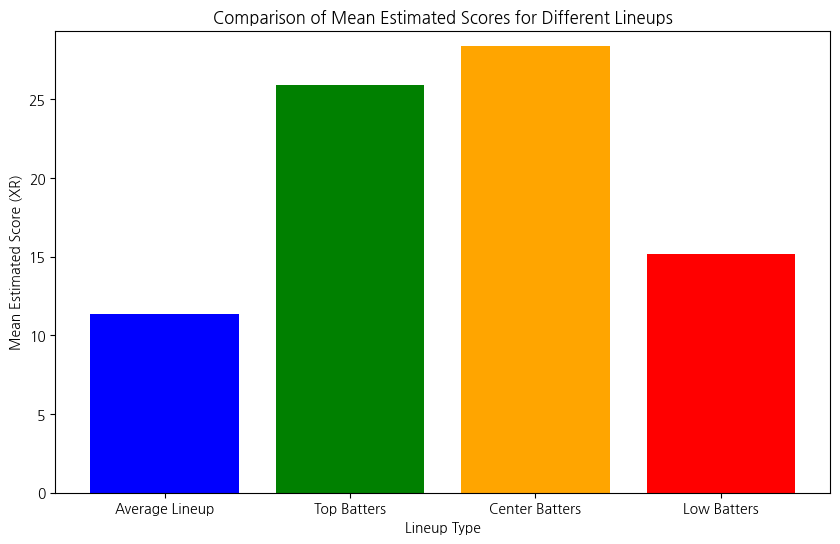

In [ ]:
lineup_names = ['Average Lineup', 'Top Batters', 'Center Batters', 'Low Batters']
mean_estimated_scores = [
    sample_lineup['추정득점'].mean(),
    sample_lineup_top['추정득점'].mean(),
    sample_lineup_center['추정득점'].mean(),
    sample_lineup_low['추정득점'].mean()
]

plt.figure(figsize=(10, 6))
plt.bar(lineup_names, mean_estimated_scores, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Lineup Type')
plt.ylabel('Mean Estimated Score (XR)')
plt.title('Comparison of Mean Estimated Scores for Different Lineups')
plt.ylim(0, max(mean_estimated_scores) + 1)
plt.show()

# 선그래프

## 연도별 시각화

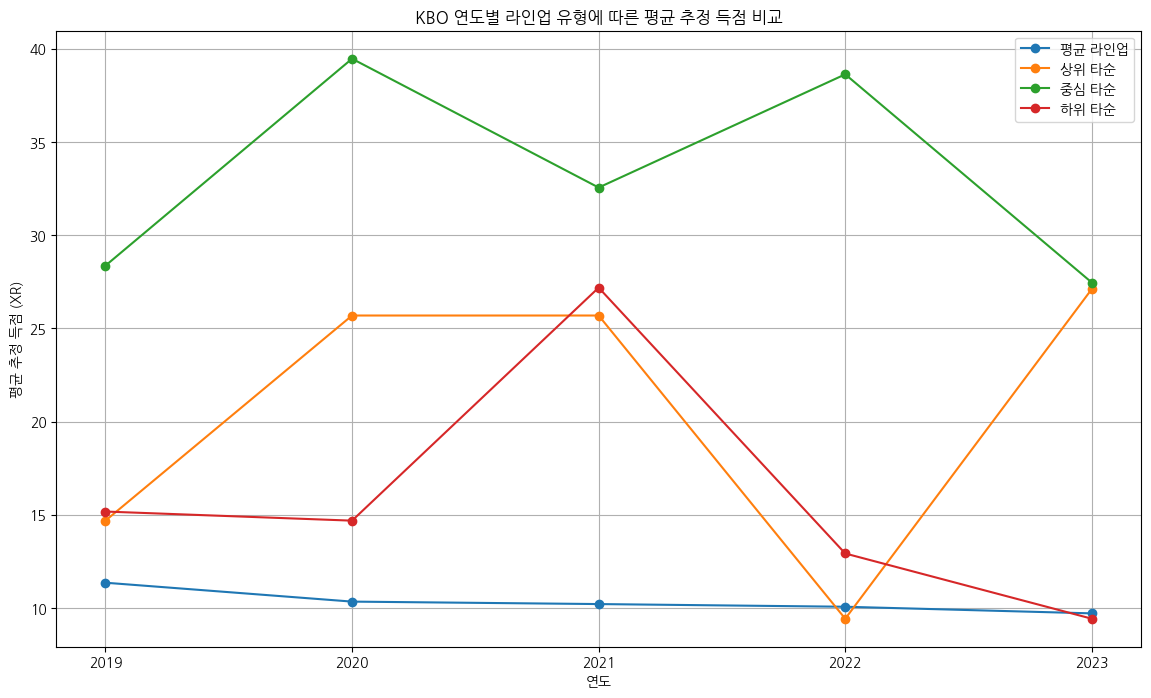

In [ ]:

detailed_user_provided_data = {
    2019: {
        '평균 라인업': 11.355332669322708,
        '상위 타순': 14.685190228784977,
        '중심 타순': 28.365999557326248,
        '하위 타순': 15.173407038512616

    },
    2020: {
        '평균 라인업': 10.34174241181296,
        '상위 타순': 25.690460130718954,
        '중심 타순': 39.46716160787531,
        '하위 타순': 14.685190228784977

    },
    2021: {
        '평균 라인업': 10.210047058823529,
        '상위 타순': 25.690460130718954,
        '중심 타순': 32.555142483660134,
        '하위 타순': 27.185858774662513
    },
    2022: {
        '평균 라인업': 10.066359165424739 ,
        '상위 타순': 9.423696400625978,
        '중심 타순': 38.630239443616496,
        '하위 타순': 12.923088425235965

    },
    2023: {
        '평균 라인업': 9.71065352112676,
        '상위 타순': 27.112730516431924,
        '중심 타순': 27.457991236306732,
        '하위 타순':  9.423696400625978

    }
}


df_detailed_user_scores = pd.DataFrame(detailed_user_provided_data).T


plt.figure(figsize=(14, 8))
for column in df_detailed_user_scores.columns:
    plt.plot(df_detailed_user_scores.index, df_detailed_user_scores[column], marker='o', label=column)

plt.xlabel('연도')
plt.ylabel('평균 추정 득점 (XR)')
plt.title('KBO 연도별 라인업 유형에 따른 평균 추정 득점 비교')
plt.xticks(ticks=df_detailed_user_scores.index)
plt.legend()
plt.grid(True)
plt.show()

## 연도별 시각화_평균라인업 제거

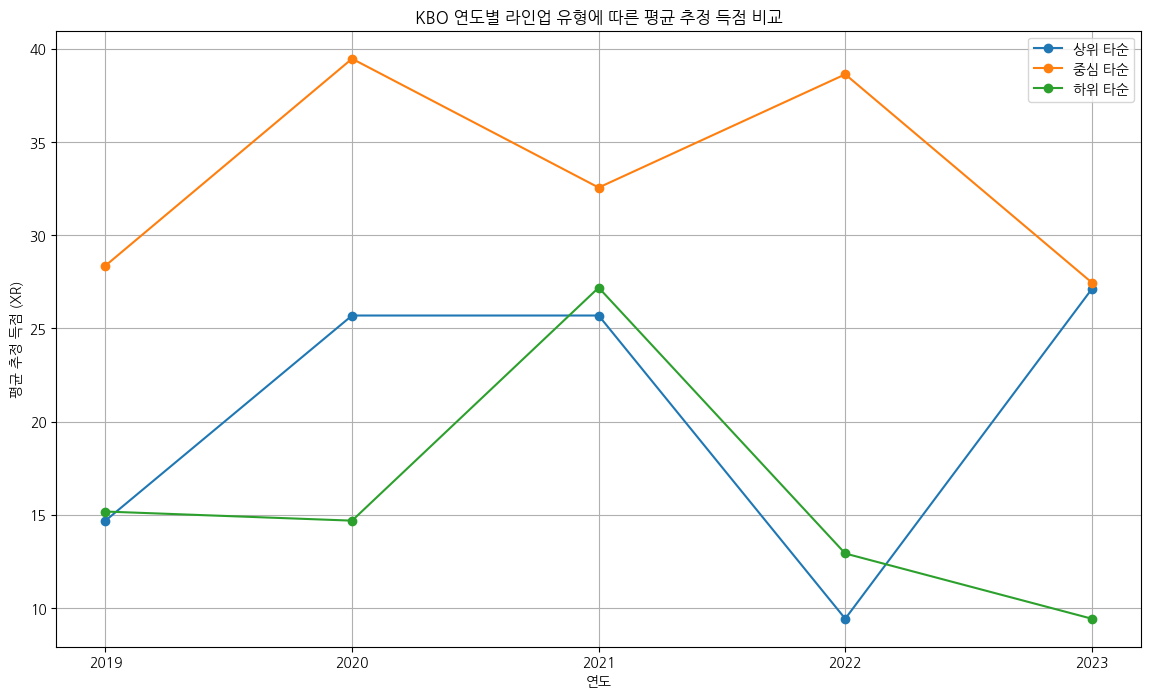

In [ ]:

detailed_user_provided_data = {
    2019: {
        '상위 타순': 14.685190228784977,
        '중심 타순': 28.365999557326248,
        '하위 타순': 15.173407038512616

    },
    2020: {
        '상위 타순': 25.690460130718954,
        '중심 타순': 39.46716160787531,
        '하위 타순': 14.685190228784977

    },
    2021: {
        '상위 타순': 25.690460130718954,
        '중심 타순': 32.555142483660134,
        '하위 타순': 27.185858774662513
    },
    2022: {
        '상위 타순': 9.423696400625978,
        '중심 타순': 38.630239443616496,
        '하위 타순': 12.923088425235965

    },
    2023: {
        '상위 타순': 27.112730516431924,
        '중심 타순': 27.457991236306732,
        '하위 타순':  9.423696400625978

    }
}


df_detailed_user_scores = pd.DataFrame(detailed_user_provided_data).T


plt.figure(figsize=(14, 8))
for column in df_detailed_user_scores.columns:
    plt.plot(df_detailed_user_scores.index, df_detailed_user_scores[column], marker='o', label=column)

plt.xlabel('연도')
plt.ylabel('평균 추정 득점 (XR)')
plt.title('KBO 연도별 라인업 유형에 따른 평균 추정 득점 비교')
plt.xticks(ticks=df_detailed_user_scores.index)
plt.legend()
plt.grid(True)
plt.show()

# 막대그래프

## 연도별 시각화

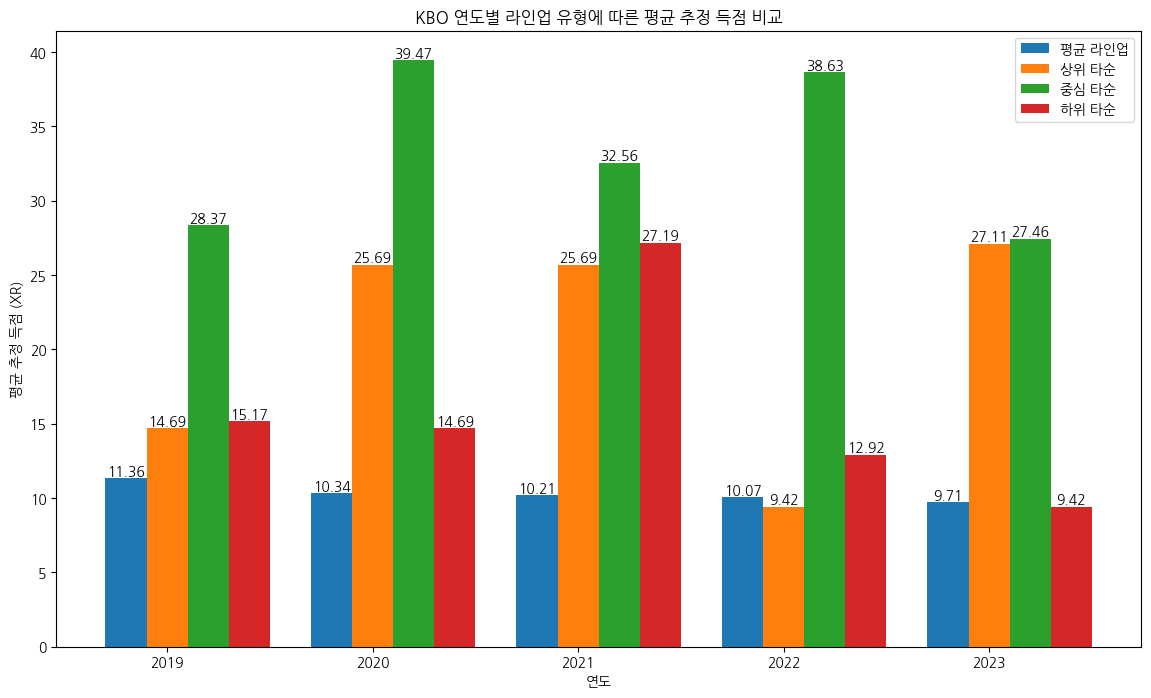

In [ ]:

detailed_user_provided_data = {
    2019: {
        '평균 라인업': 11.355332669322708,
        '상위 타순': 14.685190228784977,
        '중심 타순': 28.365999557326248,
        '하위 타순': 15.173407038512616

    },
    2020: {
        '평균 라인업': 10.34174241181296,
        '상위 타순': 25.690460130718954,
        '중심 타순': 39.46716160787531,
        '하위 타순': 14.685190228784977

    },
    2021: {
        '평균 라인업': 10.210047058823529,
        '상위 타순': 25.690460130718954,
        '중심 타순': 32.555142483660134,
        '하위 타순': 27.185858774662513
    },
    2022: {
        '평균 라인업': 10.066359165424739 ,
        '상위 타순': 9.423696400625978,
        '중심 타순': 38.630239443616496,
        '하위 타순': 12.923088425235965

    },
    2023: {
        '평균 라인업': 9.71065352112676,
        '상위 타순': 27.112730516431924,
        '중심 타순': 27.457991236306732,
        '하위 타순':  9.423696400625978

    }
}

df_detailed_user_scores = pd.DataFrame(detailed_user_provided_data).T

# 바 차트 그리기
plt.figure(figsize=(14, 8))

width = 0.2  # 바의 너비
x = np.arange(len(df_detailed_user_scores.index))  # 연도별 x 좌표

# 각 열에 대해 바 그리기
for i, column in enumerate(df_detailed_user_scores.columns):
    bars = plt.bar(x + i * width, df_detailed_user_scores[column], width=width, label=column)
    # 값 추가
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

plt.xlabel('연도')
plt.ylabel('평균 추정 득점 (XR)')
plt.title('KBO 연도별 라인업 유형에 따른 평균 추정 득점 비교')
plt.xticks(ticks=x + width, labels=df_detailed_user_scores.index)
plt.legend()
# plt.grid(True)
plt.show()

## 연도별 시각화_평균라인업 제거

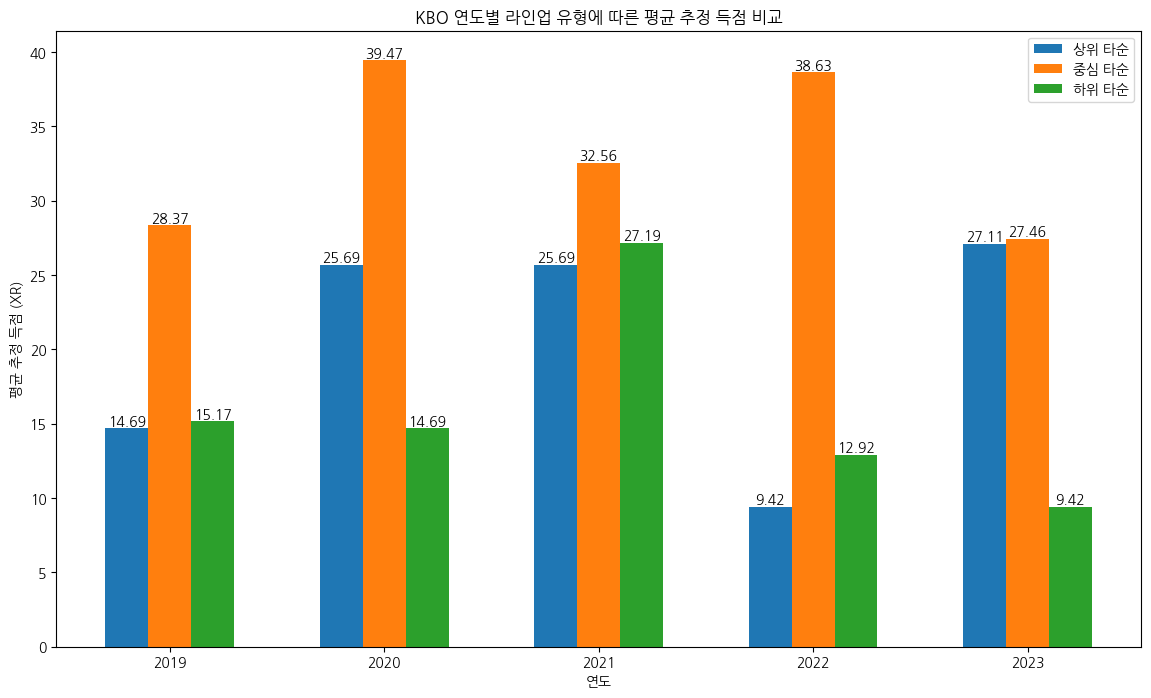

In [ ]:

detailed_user_provided_data = {
    2019: {
        '상위 타순': 14.685190228784977,
        '중심 타순': 28.365999557326248,
        '하위 타순': 15.173407038512616

    },
    2020: {
        '상위 타순': 25.690460130718954,
        '중심 타순': 39.46716160787531,
        '하위 타순': 14.685190228784977

    },
    2021: {
        '상위 타순': 25.690460130718954,
        '중심 타순': 32.555142483660134,
        '하위 타순': 27.185858774662513
    },
    2022: {
        '상위 타순': 9.423696400625978,
        '중심 타순': 38.630239443616496,
        '하위 타순': 12.923088425235965

    },
    2023: {
        '상위 타순': 27.112730516431924,
        '중심 타순': 27.457991236306732,
        '하위 타순':  9.423696400625978

    }
}

df_detailed_user_scores = pd.DataFrame(detailed_user_provided_data).T

# 바 차트 그리기
plt.figure(figsize=(14, 8))

width = 0.2  # 바의 너비
x = np.arange(len(df_detailed_user_scores.index))  # 연도별 x 좌표

# 각 열에 대해 바 그리기
for i, column in enumerate(df_detailed_user_scores.columns):
    bars = plt.bar(x + i * width, df_detailed_user_scores[column], width=width, label=column)
    # 값 추가
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

plt.xlabel('연도')
plt.ylabel('평균 추정 득점 (XR)')
plt.title('KBO 연도별 라인업 유형에 따른 평균 추정 득점 비교')
plt.xticks(ticks=x + width, labels=df_detailed_user_scores.index)
plt.legend()
# plt.grid(True)
plt.show()